In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import datetime as dt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import rcParams
sns.set_style("whitegrid", {'axes.grid' : True})


In [2]:
def get_uniq(df):
    print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
    for i in df.columns.to_list():
        print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df[i].unique()))+'\033[0m')
        print(df[i].unique())
        print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m')


In [3]:
def get_nan(df):
    df_null = pd.concat([df.isna().sum().to_frame(name='count_missig_value'), 
           df.isna().mean().to_frame(name='pct_missig_value')], axis=1)
    df_null['pct_missig_value'] = np.round(df_null['pct_missig_value']*100, 2)
    print(df_null)
    

In [4]:
def get_types(df):
    for t in set(df.dtypes):
        print('\033[34m\033[1m' + "Переменные типа" + '\033[0m', t)
        print(df.select_dtypes(include = [t]).describe(), '\n')
        

In [5]:
df1 = pd.read_excel('gelen.xlsx', sheet_name='gelen')
df2 = pd.read_excel('ozer.xlsx', sheet_name='ozer')


In [6]:
rename_dic = dict(zip(df1.columns,
['id', 'receiver_id', 'ДатаВремя', 'object_id', 'channel_id',
                        'round_value', 'Значение', 'description', 'unit']))

df1.rename(columns=rename_dic, inplace = True)


In [7]:
df1


,id,receiver_id,ДатаВремя,object_id,channel_id,round_value,Значение,description,unit
0,26517633,28,2023-01-20 15:37:39.000,MonObj37,7,-41,-41.3,"Мощность приёма, Radio1",dB
1,26517654,28,2023-01-20 15:40:03.000,MonObj37,7,-39,-39.8,"Мощность приёма, Radio1",dB
2,26517663,28,2023-01-20 15:40:54.000,MonObj37,7,-40,-40.7,"Мощность приёма, Radio1",dB
3,26517670,28,2023-01-20 15:41:46.000,MonObj37,7,-41,-41.3,"Мощность приёма, Radio1",dB
4,26517678,28,2023-01-20 15:42:31.000,MonObj37,7,-40,-40.7,"Мощность приёма, Radio1",dB
...,...,...,...,...,...,...,...,...,...
164591,26846198,31,2023-02-20 16:03:24.000,MonObj38,8,-51,-51.4,"Мощность приёма, Radio2",dB
164592,26846204,31,2023-02-20 16:04:12.000,MonObj38,8,-42,-42.9,"Мощность приёма, Radio2",dB
164593,26846210,31,2023-02-20 16:05:07.000,MonObj38,8,-40,-40.1,"Мощность приёма, Radio2",dB
164594,26846212,31,2023-02-20 16:05:49.000,MonObj38,8,-44,-44.2,"Мощность приёма, Radio2",dB


In [8]:
rename_dic = dict(zip(df2.columns,
['id', 'receiver_id', 'ДатаВремя', 'object_id', 'channel_id',
                        'round_value', 'Значение', 'description', 'unit']))

df2.rename(columns=rename_dic, inplace = True)


In [9]:
df2


,id,receiver_id,ДатаВремя,object_id,channel_id,round_value,Значение,description,unit
0,26517747,13,2023-01-20 15:53:02.000,MonObj25,7,-44,-44.2,"Мощность приёма, Radio1",dB
1,26517755,13,2023-01-20 15:53:53.000,MonObj25,7,-44,-44.8,"Мощность приёма, Radio1",dB
2,26518502,13,2023-01-20 17:22:23.000,MonObj25,7,-44,-44.8,"Мощность приёма, Radio1",dB
3,26518592,13,2023-01-20 17:31:27.000,MonObj25,7,-44,-44.2,"Мощность приёма, Radio1",dB
4,26518603,13,2023-01-20 17:32:25.000,MonObj25,7,-44,-44.8,"Мощность приёма, Radio1",dB
...,...,...,...,...,...,...,...,...,...
45618,26845012,24,2023-02-20 13:16:01.000,MonObj26,8,-37,-37.6,"Мощность приёма, Radio2",dB
45619,26845020,24,2023-02-20 13:16:47.000,MonObj26,8,-38,-38.2,"Мощность приёма, Radio2",dB
45620,26845025,24,2023-02-20 13:17:44.000,MonObj26,8,-37,-37.6,"Мощность приёма, Radio2",dB
45621,26846143,24,2023-02-20 15:54:42.000,MonObj26,8,-36,-36.9,"Мощность приёма, Radio2",dB


In [10]:
get_nan(df1)


             count_missig_value  pct_missig_value
id                            0               0.0
receiver_id                   0               0.0
ДатаВремя                     0               0.0
object_id                     0               0.0
channel_id                    0               0.0
round_value                   0               0.0
Значение                      0               0.0
description                   0               0.0
unit                          0               0.0


In [11]:
get_nan(df2)


             count_missig_value  pct_missig_value
id                            0               0.0
receiver_id                   0               0.0
ДатаВремя                     0               0.0
object_id                     0               0.0
channel_id                    0               0.0
round_value                   0               0.0
Значение                      0               0.0
description                   0               0.0
unit                          0               0.0


In [12]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           164596 non-null  int64  
 1   receiver_id  164596 non-null  int64  
 2   ДатаВремя    164596 non-null  object 
 3   object_id    164596 non-null  object 
 4   channel_id   164596 non-null  int64  
 5   round_value  164596 non-null  int64  
 6   Значение     164596 non-null  float64
 7   description  164596 non-null  object 
 8   unit         164596 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 11.3+ MB


In [13]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45623 entries, 0 to 45622
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           45623 non-null  int64  
 1   receiver_id  45623 non-null  int64  
 2   ДатаВремя    45623 non-null  object 
 3   object_id    45623 non-null  object 
 4   channel_id   45623 non-null  int64  
 5   round_value  45623 non-null  int64  
 6   Значение     45623 non-null  float64
 7   description  45623 non-null  object 
 8   unit         45623 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 3.1+ MB


In [14]:
get_types(df1)


Переменные типа int64
                 id    receiver_id     channel_id    round_value
count  1.645960e+05  164596.000000  164596.000000  164596.000000
mean   2.668973e+07      29.499174       7.502855     -42.972302
std    9.428938e+04       1.116259       0.499993       2.782578
min    2.651762e+07      28.000000       7.000000     -63.000000
25%    2.661095e+07      29.000000       7.000000     -45.000000
50%    2.669373e+07      29.000000       8.000000     -43.000000
75%    2.677311e+07      30.000000       8.000000     -41.000000
max    2.684622e+07      31.000000       8.000000     -35.000000 

Переменные типа object
                       ДатаВремя  object_id               description    unit
count                     164596     164596                    164596  164596
unique                    104923          2                         2       1
top      2023-02-05 17:30:15.000   MonObj37   Мощность приёма, Radio2      dB
freq                           4      82601             

In [15]:
get_types(df2)


Переменные типа int64
                 id   receiver_id    channel_id   round_value
count  4.562300e+04  45623.000000  45623.000000  45623.000000
mean   2.666220e+07     17.851873      9.749337    -38.622515
std    8.673150e+04      3.073683      1.555495      3.412422
min    2.651762e+07     13.000000      7.000000    -64.000000
25%    2.658568e+07     16.000000      8.000000    -40.000000
50%    2.666246e+07     18.000000     10.000000    -39.000000
75%    2.672131e+07     19.000000     11.000000    -36.000000
max    2.684623e+07     24.000000     12.000000    -33.000000 

Переменные типа object
                       ДатаВремя  object_id               description   unit
count                      45623      45623                     45623  45623
unique                     36724          4                         6      1
top      2023-02-01 05:58:57.000   MonObj28   Мощность приёма, Radio5     dB
freq                           4      23868                     10681  45623 

Переменн

In [16]:
df1.duplicated().sum()


0

In [17]:
df2.duplicated().sum()


0

In [18]:
df1.reset_index(inplace = True)
df1.drop(columns=['index'], inplace = True)
df1


,id,receiver_id,ДатаВремя,object_id,channel_id,round_value,Значение,description,unit
0,26517633,28,2023-01-20 15:37:39.000,MonObj37,7,-41,-41.3,"Мощность приёма, Radio1",dB
1,26517654,28,2023-01-20 15:40:03.000,MonObj37,7,-39,-39.8,"Мощность приёма, Radio1",dB
2,26517663,28,2023-01-20 15:40:54.000,MonObj37,7,-40,-40.7,"Мощность приёма, Radio1",dB
3,26517670,28,2023-01-20 15:41:46.000,MonObj37,7,-41,-41.3,"Мощность приёма, Radio1",dB
4,26517678,28,2023-01-20 15:42:31.000,MonObj37,7,-40,-40.7,"Мощность приёма, Radio1",dB
...,...,...,...,...,...,...,...,...,...
164591,26846198,31,2023-02-20 16:03:24.000,MonObj38,8,-51,-51.4,"Мощность приёма, Radio2",dB
164592,26846204,31,2023-02-20 16:04:12.000,MonObj38,8,-42,-42.9,"Мощность приёма, Radio2",dB
164593,26846210,31,2023-02-20 16:05:07.000,MonObj38,8,-40,-40.1,"Мощность приёма, Radio2",dB
164594,26846212,31,2023-02-20 16:05:49.000,MonObj38,8,-44,-44.2,"Мощность приёма, Radio2",dB


In [19]:
df2.reset_index(inplace = True)
df2.drop(columns=['index'], inplace = True)
df2


,id,receiver_id,ДатаВремя,object_id,channel_id,round_value,Значение,description,unit
0,26517747,13,2023-01-20 15:53:02.000,MonObj25,7,-44,-44.2,"Мощность приёма, Radio1",dB
1,26517755,13,2023-01-20 15:53:53.000,MonObj25,7,-44,-44.8,"Мощность приёма, Radio1",dB
2,26518502,13,2023-01-20 17:22:23.000,MonObj25,7,-44,-44.8,"Мощность приёма, Radio1",dB
3,26518592,13,2023-01-20 17:31:27.000,MonObj25,7,-44,-44.2,"Мощность приёма, Radio1",dB
4,26518603,13,2023-01-20 17:32:25.000,MonObj25,7,-44,-44.8,"Мощность приёма, Radio1",dB
...,...,...,...,...,...,...,...,...,...
45618,26845012,24,2023-02-20 13:16:01.000,MonObj26,8,-37,-37.6,"Мощность приёма, Radio2",dB
45619,26845020,24,2023-02-20 13:16:47.000,MonObj26,8,-38,-38.2,"Мощность приёма, Radio2",dB
45620,26845025,24,2023-02-20 13:17:44.000,MonObj26,8,-37,-37.6,"Мощность приёма, Radio2",dB
45621,26846143,24,2023-02-20 15:54:42.000,MonObj26,8,-36,-36.9,"Мощность приёма, Radio2",dB


In [20]:
df1["ДатаВремя"] = pd.to_datetime(df1["ДатаВремя"])
df1['Дата'] = df1['ДатаВремя'].dt.strftime('%Y-%m')
df1["ДатаВремя"].describe()


count                  164596
unique                 104923
top       2023-02-05 17:30:15
freq                        4
first     2023-01-20 15:35:54
last      2023-02-20 16:06:47
Name: ДатаВремя, dtype: object

In [21]:
df2["ДатаВремя"] = pd.to_datetime(df2["ДатаВремя"])
df2['Дата'] = df2['ДатаВремя'].dt.strftime('%Y-%m')
df2["ДатаВремя"].describe()


count                   45623
unique                  36724
top       2023-02-01 05:58:57
freq                        4
first     2023-01-20 15:36:26
last      2023-02-20 16:08:43
Name: ДатаВремя, dtype: object

In [22]:
df1


,id,receiver_id,ДатаВремя,object_id,channel_id,round_value,Значение,description,unit,Дата
0,26517633,28,2023-01-20 15:37:39,MonObj37,7,-41,-41.3,"Мощность приёма, Radio1",dB,2023-01
1,26517654,28,2023-01-20 15:40:03,MonObj37,7,-39,-39.8,"Мощность приёма, Radio1",dB,2023-01
2,26517663,28,2023-01-20 15:40:54,MonObj37,7,-40,-40.7,"Мощность приёма, Radio1",dB,2023-01
3,26517670,28,2023-01-20 15:41:46,MonObj37,7,-41,-41.3,"Мощность приёма, Radio1",dB,2023-01
4,26517678,28,2023-01-20 15:42:31,MonObj37,7,-40,-40.7,"Мощность приёма, Radio1",dB,2023-01
...,...,...,...,...,...,...,...,...,...,...
164591,26846198,31,2023-02-20 16:03:24,MonObj38,8,-51,-51.4,"Мощность приёма, Radio2",dB,2023-02
164592,26846204,31,2023-02-20 16:04:12,MonObj38,8,-42,-42.9,"Мощность приёма, Radio2",dB,2023-02
164593,26846210,31,2023-02-20 16:05:07,MonObj38,8,-40,-40.1,"Мощность приёма, Radio2",dB,2023-02
164594,26846212,31,2023-02-20 16:05:49,MonObj38,8,-44,-44.2,"Мощность приёма, Radio2",dB,2023-02


In [23]:
df2


,id,receiver_id,ДатаВремя,object_id,channel_id,round_value,Значение,description,unit,Дата
0,26517747,13,2023-01-20 15:53:02,MonObj25,7,-44,-44.2,"Мощность приёма, Radio1",dB,2023-01
1,26517755,13,2023-01-20 15:53:53,MonObj25,7,-44,-44.8,"Мощность приёма, Radio1",dB,2023-01
2,26518502,13,2023-01-20 17:22:23,MonObj25,7,-44,-44.8,"Мощность приёма, Radio1",dB,2023-01
3,26518592,13,2023-01-20 17:31:27,MonObj25,7,-44,-44.2,"Мощность приёма, Radio1",dB,2023-01
4,26518603,13,2023-01-20 17:32:25,MonObj25,7,-44,-44.8,"Мощность приёма, Radio1",dB,2023-01
...,...,...,...,...,...,...,...,...,...,...
45618,26845012,24,2023-02-20 13:16:01,MonObj26,8,-37,-37.6,"Мощность приёма, Radio2",dB,2023-02
45619,26845020,24,2023-02-20 13:16:47,MonObj26,8,-38,-38.2,"Мощность приёма, Radio2",dB,2023-02
45620,26845025,24,2023-02-20 13:17:44,MonObj26,8,-37,-37.6,"Мощность приёма, Radio2",dB,2023-02
45621,26846143,24,2023-02-20 15:54:42,MonObj26,8,-36,-36.9,"Мощность приёма, Radio2",dB,2023-02


In [24]:
df1['Значение'].describe()


count    164596.000000
mean        -43.403142
std           2.786982
min         -63.600000
25%         -45.100000
50%         -43.200000
75%         -41.300000
max         -35.400000
Name: Значение, dtype: float64

In [25]:
df2['Значение'].describe()


count    45623.000000
mean       -39.037650
std          3.395815
min        -64.900000
25%        -40.100000
50%        -39.100000
75%        -36.900000
max        -33.200000
Name: Значение, dtype: float64

In [26]:
get_uniq(df1)


Уникальные значения

Признак id имеет 164596 следующих уникальных значений:
[26517633 26517654 26517663 ... 26846210 26846212 26846216]
---------------------------------------------------------------------------------
Признак receiver_id имеет 4 следующих уникальных значений:
[28 29 30 31]
---------------------------------------------------------------------------------
Признак ДатаВремя имеет 104923 следующих уникальных значений:
['2023-01-20T15:37:39.000000000' '2023-01-20T15:40:03.000000000'
 '2023-01-20T15:40:54.000000000' ... '2023-02-20T15:59:47.000000000'
 '2023-02-20T16:02:29.000000000' '2023-02-20T16:03:24.000000000']
---------------------------------------------------------------------------------
Признак object_id имеет 2 следующих уникальных значений:
[' MonObj37' ' MonObj38']
---------------------------------------------------------------------------------
Признак channel_id имеет 2 следующих уникальных значений:
[7 8]
------------------------------------------------------

In [27]:
get_uniq(df2) 


Уникальные значения

Признак id имеет 45623 следующих уникальных значений:
[26517747 26517755 26518502 ... 26845025 26846143 26846149]
---------------------------------------------------------------------------------
Признак receiver_id имеет 12 следующих уникальных значений:
[13 14 15 16 17 18 19 20 21 22 23 24]
---------------------------------------------------------------------------------
Признак ДатаВремя имеет 36724 следующих уникальных значений:
['2023-01-20T15:53:02.000000000' '2023-01-20T15:53:53.000000000'
 '2023-01-20T17:22:23.000000000' ... '2023-02-20T13:17:44.000000000'
 '2023-02-20T15:54:42.000000000' '2023-02-20T15:55:30.000000000']
---------------------------------------------------------------------------------
Признак object_id имеет 4 следующих уникальных значений:
[' MonObj25' ' MonObj28' ' MonObj27' ' MonObj26']
---------------------------------------------------------------------------------
Признак channel_id имеет 6 следующих уникальных значений:
[ 7  8  9 10 

In [28]:
def get_agg(df):
    pd.set_option("display.precision", 1)
    np.set_printoptions(precision=1)
    print(df['Значение'].agg([np.mean, np.median, np.min, np.max]))
    

### РРЛ Центр - Геленджик

In [29]:
df_cen_gelen1 = df1[(df1['object_id'] == ' MonObj37') &
                    (df1['receiver_id'] == 28) & 
                    (df1['channel_id'] == 7)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_cen_gelen1


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
0,28,2023-01-20 15:37:39,MonObj37,7,-41.3,"Мощность приёма, Radio1",dB
1,28,2023-01-20 15:40:03,MonObj37,7,-39.8,"Мощность приёма, Radio1",dB
2,28,2023-01-20 15:40:54,MonObj37,7,-40.7,"Мощность приёма, Radio1",dB
3,28,2023-01-20 15:41:46,MonObj37,7,-41.3,"Мощность приёма, Radio1",dB
4,28,2023-01-20 15:42:31,MonObj37,7,-40.7,"Мощность приёма, Radio1",dB
...,...,...,...,...,...,...,...
40897,28,2023-02-20 16:03:28,MonObj37,7,-46.7,"Мощность приёма, Radio1",dB
40898,28,2023-02-20 16:04:11,MonObj37,7,-42.6,"Мощность приёма, Radio1",dB
40899,28,2023-02-20 16:05:07,MonObj37,7,-43.8,"Мощность приёма, Radio1",dB
40900,28,2023-02-20 16:05:55,MonObj37,7,-46.0,"Мощность приёма, Radio1",dB


In [30]:
get_agg(df_cen_gelen1)


mean     -43.6
median   -43.2
amin     -61.4
amax     -37.6
Name: Значение, dtype: float64


In [31]:
df_cen_gelen1.to_csv('cen_gelen1.csv', index=False) # Центр - Геленджик 1


In [32]:
df_cen_gelen2 = df1[(df1['object_id'] == ' MonObj37') &
                    (df1['receiver_id'] == 29) & 
                    (df1['channel_id'] == 8)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_cen_gelen2


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
40902,29,2023-01-20 15:40:03,MonObj37,8,-39.8,"Мощность приёма, Radio2",dB
40903,29,2023-01-20 15:40:54,MonObj37,8,-40.4,"Мощность приёма, Radio2",dB
40904,29,2023-01-20 15:42:31,MonObj37,8,-40.1,"Мощность приёма, Radio2",dB
40905,29,2023-01-20 15:45:10,MonObj37,8,-40.1,"Мощность приёма, Radio2",dB
40906,29,2023-01-20 15:47:30,MonObj37,8,-41.3,"Мощность приёма, Radio2",dB
...,...,...,...,...,...,...,...
82596,29,2023-02-20 16:03:28,MonObj37,8,-47.3,"Мощность приёма, Radio2",dB
82597,29,2023-02-20 16:04:11,MonObj37,8,-45.1,"Мощность приёма, Radio2",dB
82598,29,2023-02-20 16:05:07,MonObj37,8,-47.3,"Мощность приёма, Radio2",dB
82599,29,2023-02-20 16:05:55,MonObj37,8,-51.4,"Мощность приёма, Radio2",dB


In [33]:
get_agg(df_cen_gelen2)


mean     -45.2
median   -44.8
amin     -63.6
amax     -38.5
Name: Значение, dtype: float64


In [34]:
df_cen_gelen2.to_csv('cen_gelen2.csv', index=False) # Центр - Геленджик 2


In [35]:
df_gelen_cen1 = df1[(df1['object_id'] == ' MonObj38') &
                    (df1['receiver_id'] == 30) & 
                    (df1['channel_id'] == 7)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_gelen_cen1


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
82601,30,2023-01-20 15:36:40,MonObj38,7,-48.9,"Мощность приёма, Radio1",dB
82602,30,2023-01-20 15:37:25,MonObj38,7,-50.1,"Мощность приёма, Radio1",dB
82603,30,2023-01-20 15:38:06,MonObj38,7,-49.2,"Мощность приёма, Radio1",dB
82604,30,2023-01-20 15:39:01,MonObj38,7,-49.8,"Мощность приёма, Radio1",dB
82605,30,2023-01-20 15:40:32,MonObj38,7,-48.2,"Мощность приёма, Radio1",dB
...,...,...,...,...,...,...,...
123522,30,2023-02-20 16:02:28,MonObj38,7,-39.8,"Мощность приёма, Radio1",dB
123523,30,2023-02-20 16:04:12,MonObj38,7,-38.2,"Мощность приёма, Radio1",dB
123524,30,2023-02-20 16:05:07,MonObj38,7,-39.1,"Мощность приёма, Radio1",dB
123525,30,2023-02-20 16:05:49,MonObj38,7,-38.5,"Мощность приёма, Radio1",dB


In [36]:
get_agg(df_gelen_cen1)


mean     -42.5
median   -42.0
amin     -62.4
amax     -36.6
Name: Значение, dtype: float64


In [37]:
df_gelen_cen1.to_csv('gelen_cen1.csv', index=False) # Геленджик - Центр 1


In [38]:
df_gelen_cen2 = df1[(df1['object_id'] == ' MonObj38') &
                    (df1['receiver_id'] == 31) & 
                    (df1['channel_id'] == 8)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_gelen_cen2


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
123527,31,2023-01-20 15:35:54,MonObj38,8,-38.2,"Мощность приёма, Radio2",dB
123528,31,2023-01-20 15:36:40,MonObj38,8,-38.8,"Мощность приёма, Radio2",dB
123529,31,2023-01-20 15:40:32,MonObj38,8,-39.1,"Мощность приёма, Radio2",dB
123530,31,2023-01-20 15:42:19,MonObj38,8,-38.5,"Мощность приёма, Radio2",dB
123531,31,2023-01-20 15:44:04,MonObj38,8,-39.5,"Мощность приёма, Radio2",dB
...,...,...,...,...,...,...,...
164591,31,2023-02-20 16:03:24,MonObj38,8,-51.4,"Мощность приёма, Radio2",dB
164592,31,2023-02-20 16:04:12,MonObj38,8,-42.9,"Мощность приёма, Radio2",dB
164593,31,2023-02-20 16:05:07,MonObj38,8,-40.1,"Мощность приёма, Radio2",dB
164594,31,2023-02-20 16:05:49,MonObj38,8,-44.2,"Мощность приёма, Radio2",dB


In [39]:
get_agg(df_gelen_cen2)


mean     -42.3
median   -42.0
amin     -60.8
amax     -35.4
Name: Значение, dtype: float64


In [40]:
df_gelen_cen2.to_csv('gelen_cen2.csv', index=False) # Геленджик - Центр 2


In [41]:
spisok_df=[df_cen_gelen1, df_cen_gelen2, df_gelen_cen1, df_gelen_cen2]
spisok_title=['РРЛ Центр-Геленджик 1', 'РРЛ Центр-Геленджик 2', 'РРЛ Геленджик-Центр 1', 'РРЛ Геленджик-Центр 2']
colors=['y','gold','indianred','coral']


In [42]:
def get_plot():
    plt.figure(figsize=(14, 5))
    sns.lineplot(data = spisok_df[i], x = "ДатаВремя", y = "Значение", legend = 'auto', color = colors[i])\
                                                                         .set(title=spisok_title[i]);
    plt.show()
    

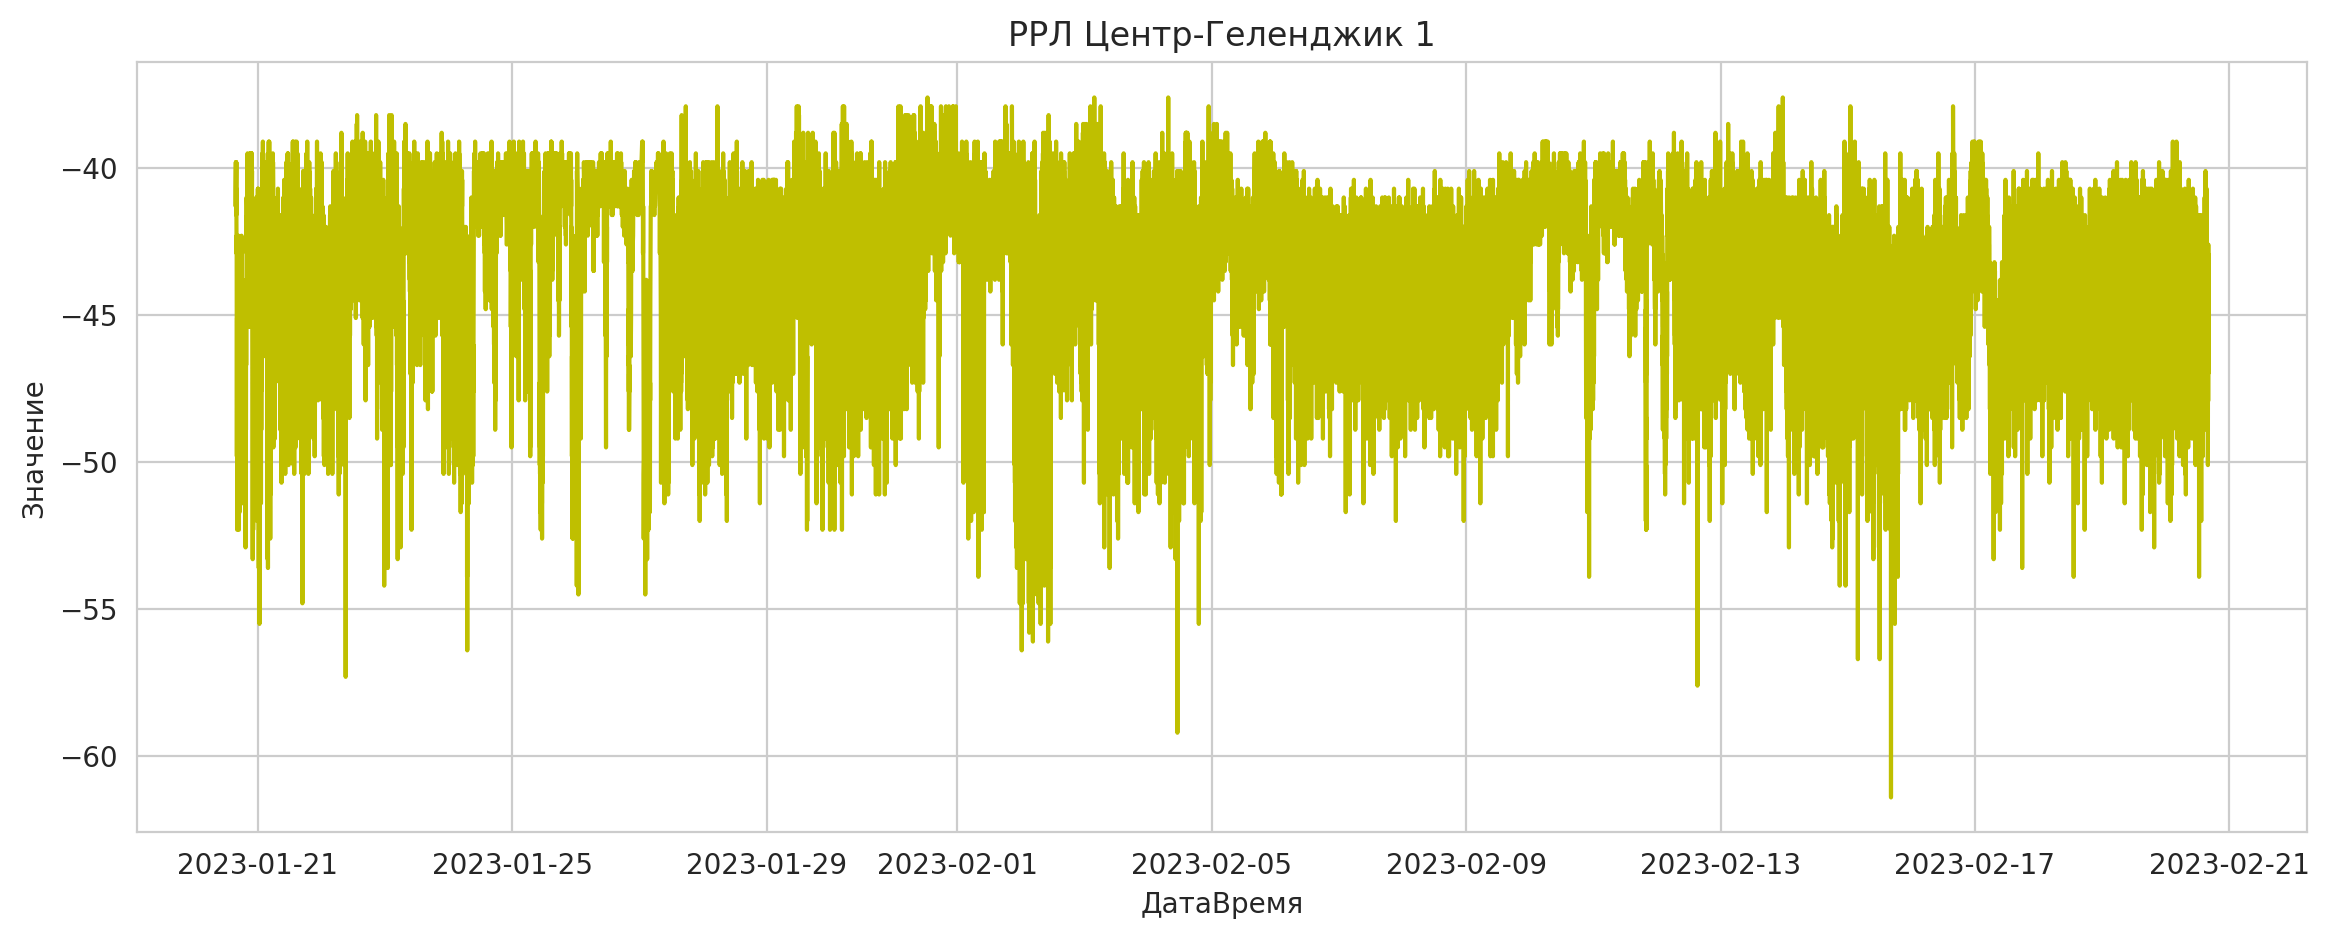

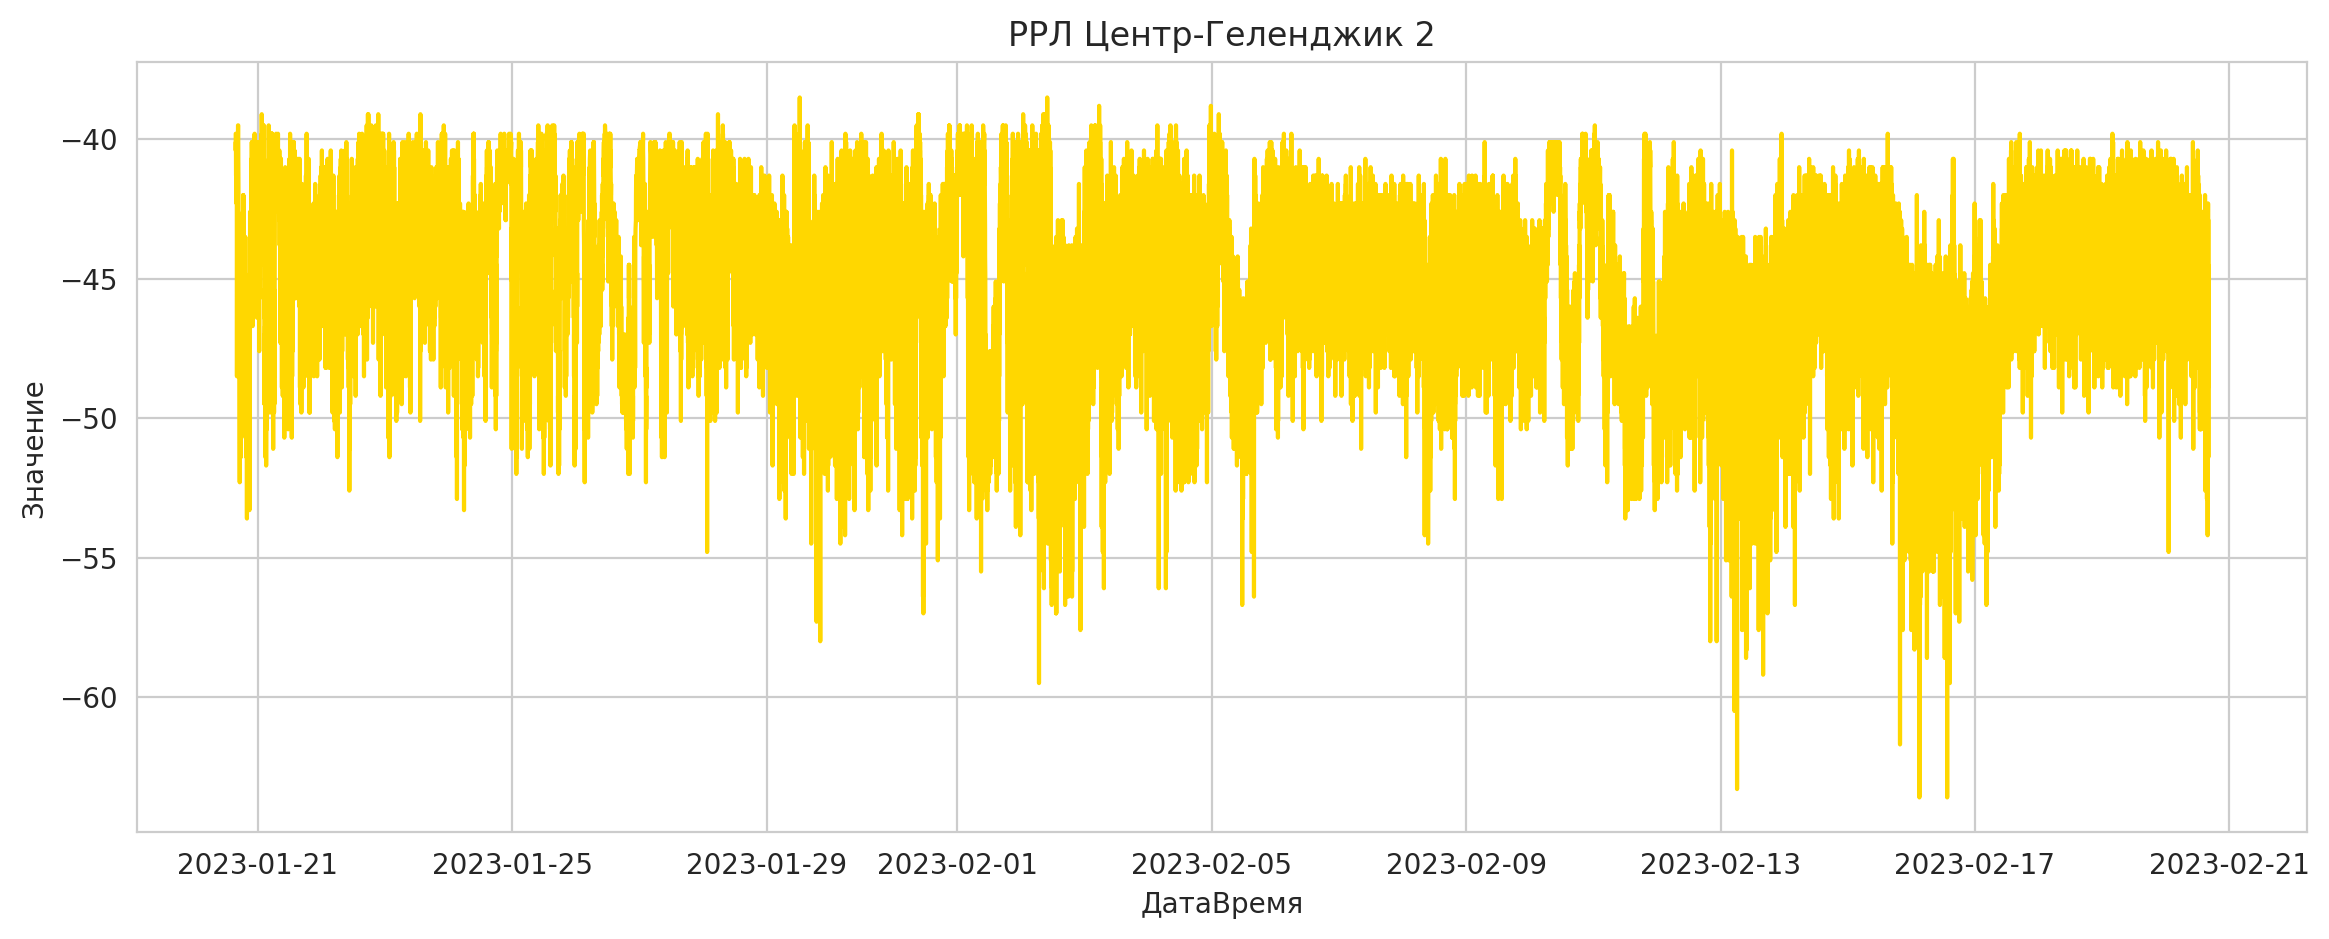

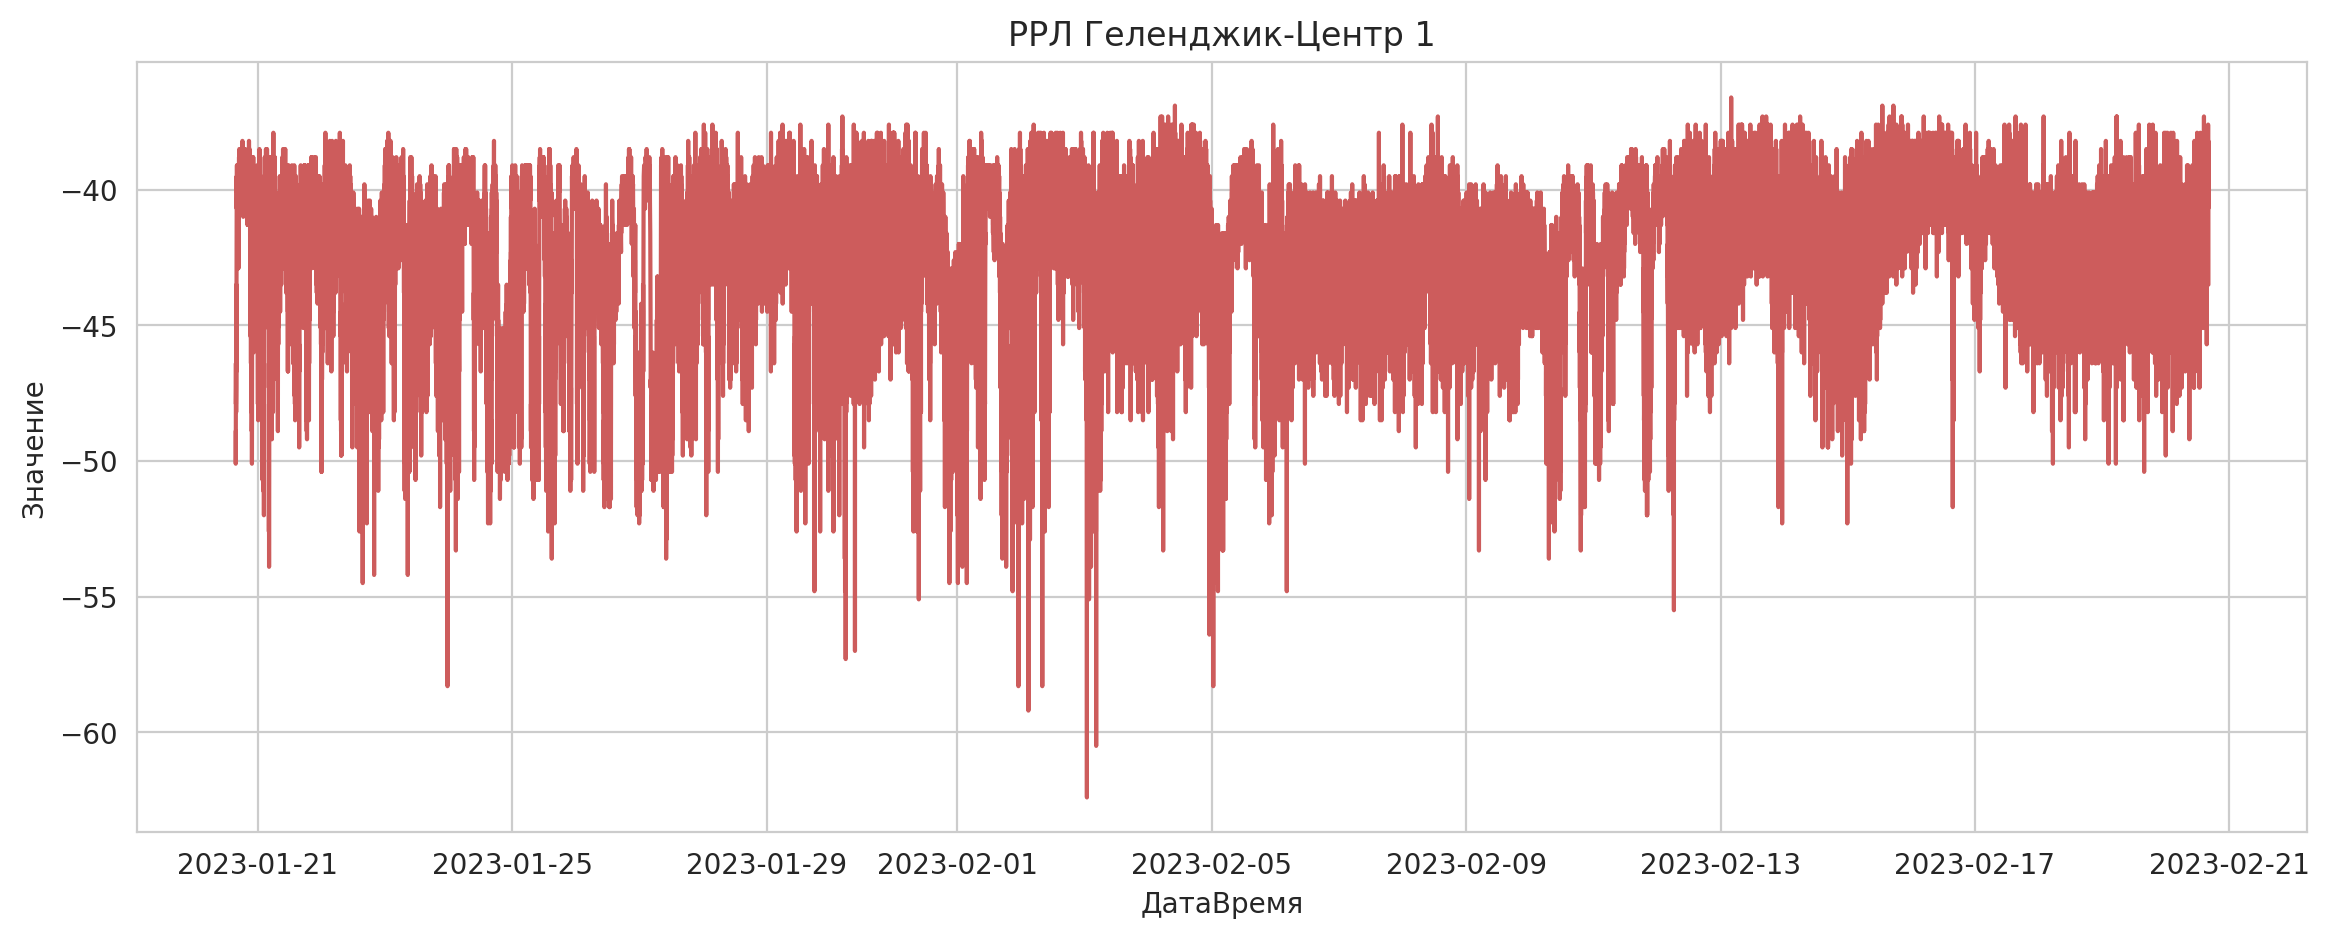

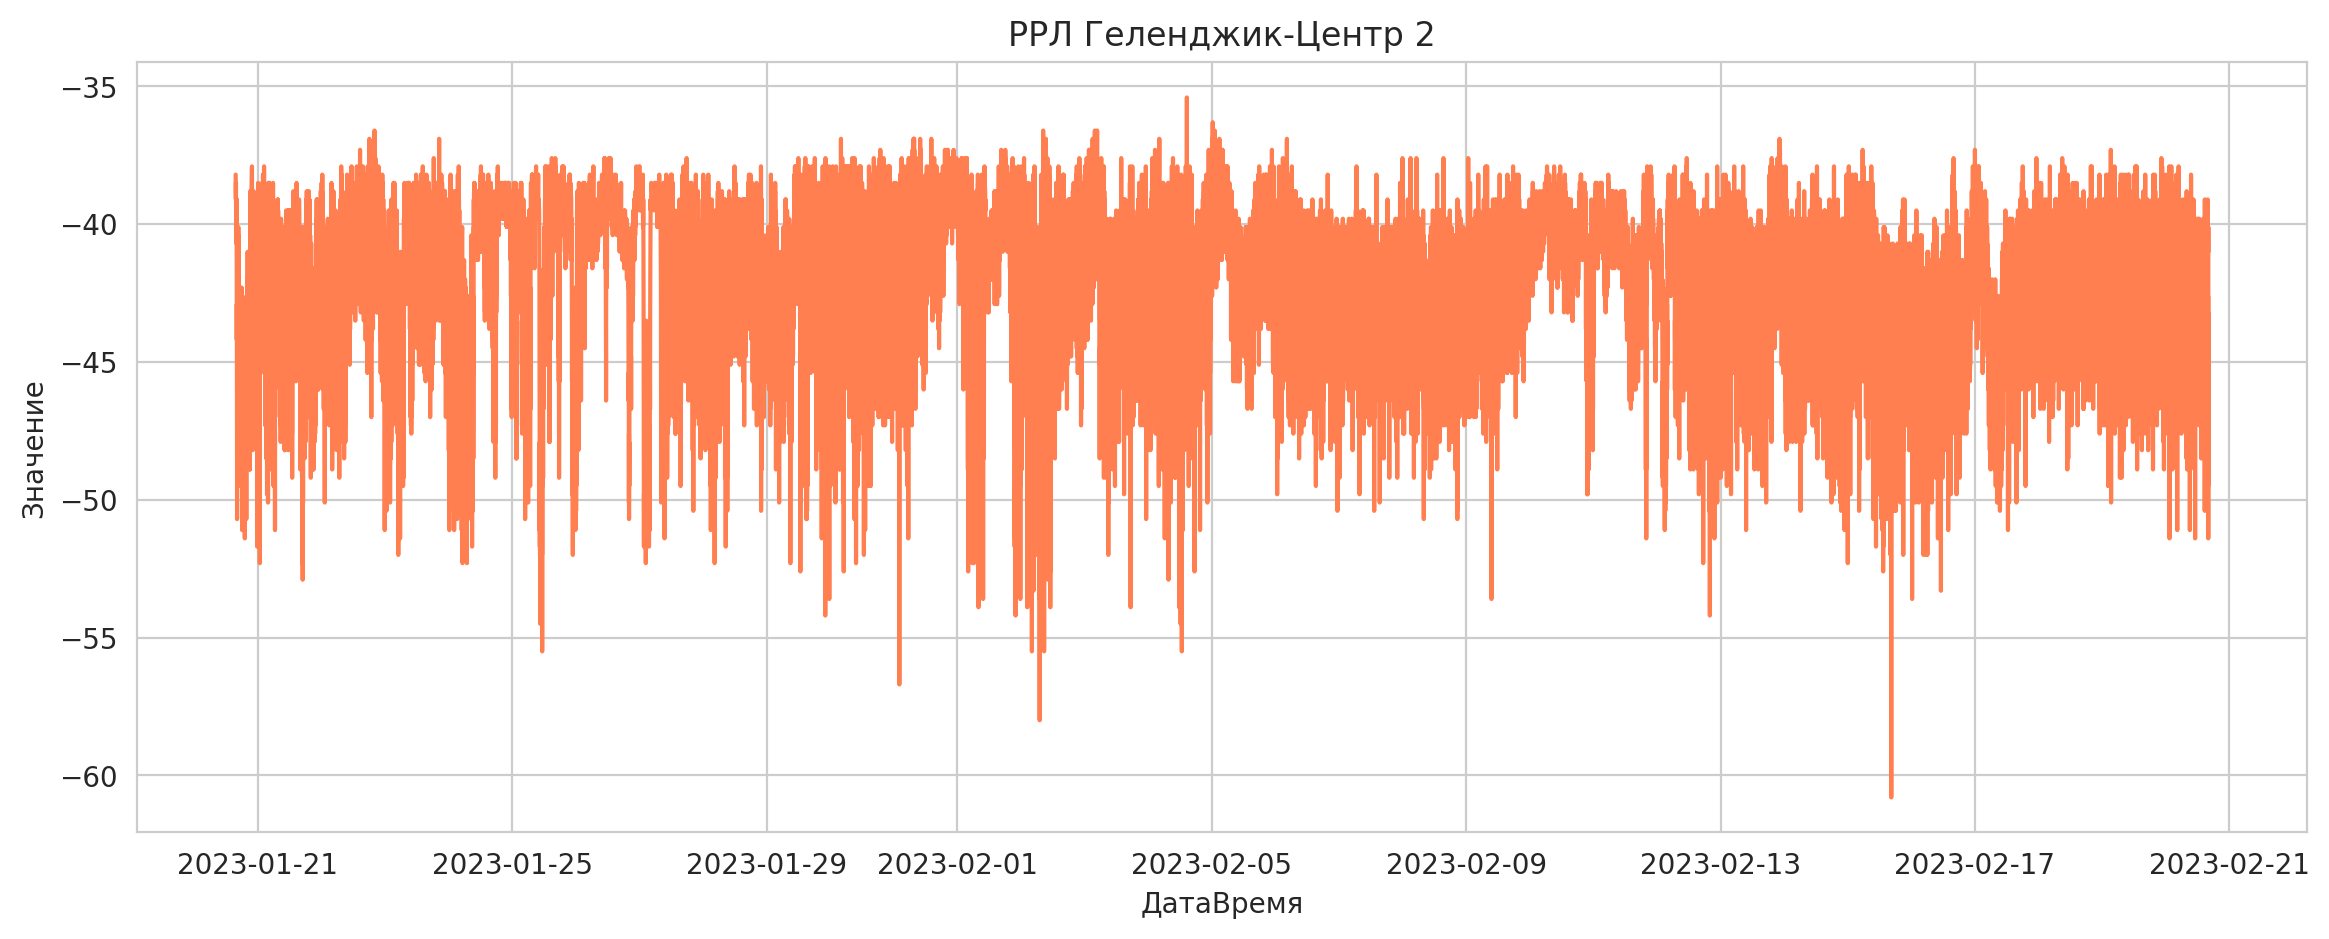

In [43]:
for i in range (0, len(spisok_df)):
    get_plot()
    

### РРЛ Центр - Ю. Озереевка

#### Пролёт Центр - КРТПЦ

In [44]:
df_cen_krtpc1 = df2[(df2['object_id'] == ' MonObj25') &
                    (df2['receiver_id'] == 13) & 
                    (df2['channel_id'] == 7)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_cen_krtpc1


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
0,13,2023-01-20 15:53:02,MonObj25,7,-44.2,"Мощность приёма, Radio1",dB
1,13,2023-01-20 15:53:53,MonObj25,7,-44.8,"Мощность приёма, Radio1",dB
2,13,2023-01-20 17:22:23,MonObj25,7,-44.8,"Мощность приёма, Radio1",dB
3,13,2023-01-20 17:31:27,MonObj25,7,-44.2,"Мощность приёма, Radio1",dB
4,13,2023-01-20 17:32:25,MonObj25,7,-44.8,"Мощность приёма, Radio1",dB
...,...,...,...,...,...,...,...
3012,13,2023-02-20 09:16:59,MonObj25,7,-47.3,"Мощность приёма, Radio1",dB
3013,13,2023-02-20 09:21:00,MonObj25,7,-46.0,"Мощность приёма, Radio1",dB
3014,13,2023-02-20 12:22:08,MonObj25,7,-46.4,"Мощность приёма, Radio1",dB
3015,13,2023-02-20 12:47:54,MonObj25,7,-46.7,"Мощность приёма, Radio1",dB


In [45]:
get_agg(df_cen_krtpc1)


mean     -45.6
median   -45.4
amin     -63.9
amax     -42.6
Name: Значение, dtype: float64


In [46]:
df_cen_krtpc1.to_csv('cen_krtpc1.csv', index=False) # Центр - КРТПЦ 1


In [47]:
df_cen_krtpc2 = df2[(df2['object_id'] == ' MonObj25') &
                    (df2['receiver_id'] == 14) & 
                    (df2['channel_id'] == 8)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_cen_krtpc2


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
3017,14,2023-01-20 15:52:22,MonObj25,8,-40.7,"Мощность приёма, Radio2",dB
3018,14,2023-01-20 15:53:02,MonObj25,8,-40.1,"Мощность приёма, Radio2",dB
3019,14,2023-01-20 16:52:59,MonObj25,8,-39.8,"Мощность приёма, Radio2",dB
3020,14,2023-01-20 16:59:31,MonObj25,8,-39.8,"Мощность приёма, Radio2",dB
3021,14,2023-01-20 17:22:24,MonObj25,8,-40.4,"Мощность приёма, Radio2",dB
...,...,...,...,...,...,...,...
6460,14,2023-02-20 09:21:00,MonObj25,8,-41.0,"Мощность приёма, Radio2",dB
6461,14,2023-02-20 12:47:54,MonObj25,8,-41.3,"Мощность приёма, Radio2",dB
6462,14,2023-02-20 12:48:53,MonObj25,8,-40.7,"Мощность приёма, Radio2",dB
6463,14,2023-02-20 12:49:42,MonObj25,8,-41.3,"Мощность приёма, Radio2",dB


In [48]:
get_agg(df_cen_krtpc2)


mean     -40.6
median   -40.4
amin     -58.6
amax     -37.9
Name: Значение, dtype: float64


In [49]:
df_cen_krtpc2.to_csv('cen_krtpc2.csv', index=False) # Центр - КРТПЦ 2


In [50]:
df_krtpc_cen1 = df2[(df2['object_id'] == ' MonObj28') &
                    (df2['receiver_id'] == 15) & 
                    (df2['channel_id'] == 9)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_krtpc_cen1


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
6465,15,2023-01-20 16:09:22,MonObj28,9,-43.5,"Мощность приёма, Radio4",dB
6466,15,2023-01-20 16:11:50,MonObj28,9,-42.9,"Мощность приёма, Radio4",dB
6467,15,2023-01-20 16:48:52,MonObj28,9,-42.9,"Мощность приёма, Radio4",dB
6468,15,2023-01-20 17:00:32,MonObj28,9,-43.5,"Мощность приёма, Radio4",dB
6469,15,2023-01-20 17:32:08,MonObj28,9,-43.5,"Мощность приёма, Radio4",dB
...,...,...,...,...,...,...,...
9316,15,2023-02-20 13:06:18,MonObj28,9,-45.7,"Мощность приёма, Radio4",dB
9317,15,2023-02-20 13:13:09,MonObj28,9,-45.1,"Мощность приёма, Radio4",dB
9318,15,2023-02-20 13:13:56,MonObj28,9,-45.7,"Мощность приёма, Radio4",dB
9319,15,2023-02-20 15:24:16,MonObj28,9,-44.2,"Мощность приёма, Radio4",dB


In [51]:
get_agg(df_krtpc_cen1)


mean     -44.1
median   -43.8
amin     -62.0
amax     -41.0
Name: Значение, dtype: float64


In [52]:
df_krtpc_cen1.to_csv('krtpc_cen1.csv', index=False) # КРТПЦ - Центр 1


In [53]:
df_krtpc_cen2 = df2[(df2['object_id'] == ' MonObj28') &
                    (df2['receiver_id'] == 16) & 
                    (df2['channel_id'] == 10)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_krtpc_cen2


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
9321,16,2023-01-20 16:09:22,MonObj28,10,-39.5,"Мощность приёма, Radio5",dB
9322,16,2023-01-20 16:10:09,MonObj28,10,-38.8,"Мощность приёма, Radio5",dB
9323,16,2023-01-20 16:47:58,MonObj28,10,-39.5,"Мощность приёма, Radio5",dB
9324,16,2023-01-20 16:48:52,MonObj28,10,-38.8,"Мощность приёма, Radio5",dB
9325,16,2023-01-20 17:00:32,MonObj28,10,-39.5,"Мощность приёма, Radio5",dB
...,...,...,...,...,...,...,...
16108,16,2023-02-20 14:13:12,MonObj28,10,-39.5,"Мощность приёма, Radio5",dB
16109,16,2023-02-20 14:22:26,MonObj28,10,-39.1,"Мощность приёма, Radio5",dB
16110,16,2023-02-20 14:23:17,MonObj28,10,-39.5,"Мощность приёма, Radio5",dB
16111,16,2023-02-20 14:26:32,MonObj28,10,-39.1,"Мощность приёма, Radio5",dB


In [54]:
get_agg(df_krtpc_cen2)


mean     -39.6
median   -39.5
amin     -57.6
amax     -36.9
Name: Значение, dtype: float64


In [55]:
df_krtpc_cen2.to_csv('krtpc_cen2.csv', index=False) # КРТПЦ - Центр 2


#### Пролёт КРТПЦ - Абрау

In [56]:
df_krtpc_abrau1 = df2[(df2['object_id'] == ' MonObj28') &
                    (df2['receiver_id'] == 17) & 
                    (df2['channel_id'] == 11)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_krtpc_abrau1


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
16113,17,2023-01-20 16:08:03,MonObj28,11,-39.1,"Мощность приема, Radio2",dB
16114,17,2023-01-20 16:08:50,MonObj28,11,-39.8,"Мощность приема, Radio2",dB
16115,17,2023-01-20 16:20:03,MonObj28,11,-39.1,"Мощность приема, Radio2",dB
16116,17,2023-01-20 16:22:38,MonObj28,11,-39.5,"Мощность приема, Radio2",dB
16117,17,2023-01-20 16:23:34,MonObj28,11,-39.1,"Мощность приема, Radio2",dB
...,...,...,...,...,...,...,...
22757,17,2023-02-20 13:15:49,MonObj28,11,-44.8,"Мощность приема, Radio2",dB
22758,17,2023-02-20 13:46:41,MonObj28,11,-43.5,"Мощность приема, Radio2",dB
22759,17,2023-02-20 13:49:27,MonObj28,11,-43.5,"Мощность приема, Radio2",dB
22760,17,2023-02-20 13:54:24,MonObj28,11,-43.5,"Мощность приема, Radio2",dB


In [57]:
get_agg(df_krtpc_abrau1)


mean     -39.8
median   -39.5
amin     -62.7
amax     -37.6
Name: Значение, dtype: float64


In [58]:
df_krtpc_abrau1.to_csv('krtpc_abrau1.csv', index=False) # КРТПЦ - Абрау 1


In [59]:
df_krtpc_abrau2 = df2[(df2['object_id'] == ' MonObj28') &
                    (df2['receiver_id'] == 18) & 
                    (df2['channel_id'] == 12)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_krtpc_abrau2


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
22762,18,2023-01-20 15:36:26,MonObj28,12,-34.7,"Мощность приема, Radio3",dB
22763,18,2023-01-20 15:37:11,MonObj28,12,-35.1,"Мощность приема, Radio3",dB
22764,18,2023-01-20 15:37:56,MonObj28,12,-34.7,"Мощность приема, Radio3",dB
22765,18,2023-01-20 15:38:44,MonObj28,12,-35.1,"Мощность приема, Radio3",dB
22766,18,2023-01-20 16:08:03,MonObj28,12,-34.7,"Мощность приема, Radio3",dB
...,...,...,...,...,...,...,...
30328,18,2023-02-20 13:34:21,MonObj28,12,-39.5,"Мощность приема, Radio3",dB
30329,18,2023-02-20 13:35:06,MonObj28,12,-39.1,"Мощность приема, Radio3",dB
30330,18,2023-02-20 13:37:37,MonObj28,12,-39.5,"Мощность приема, Radio3",dB
30331,18,2023-02-20 13:38:27,MonObj28,12,-39.1,"Мощность приема, Radio3",dB


In [60]:
get_agg(df_krtpc_abrau2)


mean     -35.4
median   -35.1
amin     -59.5
amax     -33.2
Name: Значение, dtype: float64


In [61]:
df_krtpc_abrau2.to_csv('krtpc_abrau2.csv', index=False) # КРТПЦ - Абрау 2


In [62]:
df_abrau_krtpc1 = df2[(df2['object_id'] == ' MonObj27') &
                    (df2['receiver_id'] == 19) & 
                    (df2['channel_id'] == 9)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_abrau_krtpc1


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
30333,19,2023-01-20 17:16:13,MonObj27,9,-39.5,"Мощность приёма, Radio4",dB
30334,19,2023-01-20 17:17:15,MonObj27,9,-39.1,"Мощность приёма, Radio4",dB
30335,19,2023-01-20 18:18:01,MonObj27,9,-39.5,"Мощность приёма, Radio4",dB
30336,19,2023-01-20 18:18:52,MonObj27,9,-38.8,"Мощность приёма, Radio4",dB
30337,19,2023-01-20 18:32:24,MonObj27,9,-38.5,"Мощность приёма, Radio4",dB
...,...,...,...,...,...,...,...
34876,19,2023-02-20 15:12:47,MonObj27,9,-39.1,"Мощность приёма, Radio4",dB
34877,19,2023-02-20 15:35:39,MonObj27,9,-39.5,"Мощность приёма, Radio4",dB
34878,19,2023-02-20 15:36:30,MonObj27,9,-38.8,"Мощность приёма, Radio4",dB
34879,19,2023-02-20 16:07:45,MonObj27,9,-39.5,"Мощность приёма, Radio4",dB


In [63]:
get_agg(df_abrau_krtpc1)


mean     -39.7
median   -39.5
amin     -64.9
amax     -37.9
Name: Значение, dtype: float64


In [64]:
df_abrau_krtpc1.to_csv('abrau_krtpc1.csv', index=False) # Абрау - КРТПЦ 1


In [65]:
df_abrau_krtpc2 = df2[(df2['object_id'] == ' MonObj27') &
                    (df2['receiver_id'] == 20) & 
                    (df2['channel_id'] == 10)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_abrau_krtpc2


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
34881,20,2023-01-20 17:16:14,MonObj27,10,-35.1,"Мощность приёма, Radio5",dB
34882,20,2023-01-20 17:17:15,MonObj27,10,-34.7,"Мощность приёма, Radio5",dB
34883,20,2023-01-20 17:32:49,MonObj27,10,-34.1,"Мощность приёма, Radio5",dB
34884,20,2023-01-20 17:33:42,MonObj27,10,-34.7,"Мощность приёма, Radio5",dB
34885,20,2023-01-20 18:18:02,MonObj27,10,-35.1,"Мощность приёма, Radio5",dB
...,...,...,...,...,...,...,...
38765,20,2023-02-20 15:18:45,MonObj27,10,-34.4,"Мощность приёма, Radio5",dB
38766,20,2023-02-20 15:34:43,MonObj27,10,-35.1,"Мощность приёма, Radio5",dB
38767,20,2023-02-20 15:36:30,MonObj27,10,-34.7,"Мощность приёма, Radio5",dB
38768,20,2023-02-20 15:55:03,MonObj27,10,-35.1,"Мощность приёма, Radio5",dB


In [66]:
get_agg(df_abrau_krtpc2)


mean     -35.4
median   -35.1
amin     -59.8
amax     -33.2
Name: Значение, dtype: float64


In [67]:
df_abrau_krtpc2.to_csv('abrau_krtpc2.csv', index=False) # Абрау - КРТПЦ 2


#### Пролёт Абрау - Ю.Озереевка

In [68]:
df_abrau_ozer1 = df2[(df2['object_id'] == ' MonObj27') &
                    (df2['receiver_id'] == 21) & 
                    (df2['channel_id'] == 11)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_abrau_ozer1


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
38770,21,2023-01-20 20:29:19,MonObj27,11,-42.0,"Мощность приема, Radio2",dB
38771,21,2023-01-20 20:30:18,MonObj27,11,-41.3,"Мощность приема, Radio2",dB
38772,21,2023-01-20 20:45:36,MonObj27,11,-41.0,"Мощность приема, Radio2",dB
38773,21,2023-01-20 20:46:22,MonObj27,11,-41.6,"Мощность приема, Radio2",dB
38774,21,2023-01-20 21:20:48,MonObj27,11,-41.3,"Мощность приема, Radio2",dB
...,...,...,...,...,...,...,...
38949,21,2023-02-20 06:47:01,MonObj27,11,-42.6,"Мощность приема, Radio2",dB
38950,21,2023-02-20 06:48:00,MonObj27,11,-42.0,"Мощность приема, Radio2",dB
38951,21,2023-02-20 08:50:08,MonObj27,11,-42.3,"Мощность приема, Radio2",dB
38952,21,2023-02-20 08:52:02,MonObj27,11,-42.9,"Мощность приема, Radio2",dB


In [69]:
get_agg(df_abrau_ozer1)


mean     -43.5
median   -43.2
amin     -48.5
amax     -41.0
Name: Значение, dtype: float64


In [70]:
df_abrau_ozer1.to_csv('abrau_ozer1.csv', index=False) # Абрау - Ю. Озереевка 1


In [71]:
df_abrau_ozer2 = df2[(df2['object_id'] == ' MonObj27') &
                    (df2['receiver_id'] == 22) & 
                    (df2['channel_id'] == 12)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_abrau_ozer2


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
38954,22,2023-01-20 20:21:34,MonObj27,12,-36.3,"Мощность приема, Radio3",dB
38955,22,2023-01-20 20:22:38,MonObj27,12,-36.9,"Мощность приема, Radio3",dB
38956,22,2023-01-20 20:29:19,MonObj27,12,-37.3,"Мощность приема, Radio3",dB
38957,22,2023-01-20 20:30:18,MonObj27,12,-36.6,"Мощность приема, Radio3",dB
38958,22,2023-01-20 21:19:58,MonObj27,12,-37.3,"Мощность приема, Radio3",dB
...,...,...,...,...,...,...,...
39824,22,2023-02-20 11:53:27,MonObj27,12,-36.9,"Мощность приема, Radio3",dB
39825,22,2023-02-20 11:55:22,MonObj27,12,-37.3,"Мощность приема, Radio3",dB
39826,22,2023-02-20 11:56:22,MonObj27,12,-36.9,"Мощность приема, Radio3",dB
39827,22,2023-02-20 12:35:29,MonObj27,12,-37.3,"Мощность приема, Radio3",dB


In [72]:
get_agg(df_abrau_ozer2)


mean     -37.5
median   -37.3
amin     -43.2
amax     -36.3
Name: Значение, dtype: float64


In [73]:
df_abrau_ozer2.to_csv('abrau_ozer2.csv', index=False) # Абрау - Ю. Озереевка 2


In [74]:
df_ozer_abrau1 = df2[(df2['object_id'] == ' MonObj26') &
                    (df2['receiver_id'] == 23) & 
                    (df2['channel_id'] == 7)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_ozer_abrau1


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
39829,23,2023-01-20 19:46:17,MonObj26,7,-41.6,"Мощность приёма, Radio1",dB
39830,23,2023-01-20 20:32:40,MonObj26,7,-41.3,"Мощность приёма, Radio1",dB
39831,23,2023-01-20 20:36:37,MonObj26,7,-41.3,"Мощность приёма, Radio1",dB
39832,23,2023-01-20 20:47:50,MonObj26,7,-41.3,"Мощность приёма, Radio1",dB
39833,23,2023-01-20 20:48:34,MonObj26,7,-42.0,"Мощность приёма, Radio1",dB
...,...,...,...,...,...,...,...
40046,23,2023-02-20 06:24:16,MonObj26,7,-43.5,"Мощность приёма, Radio1",dB
40047,23,2023-02-20 06:25:15,MonObj26,7,-42.9,"Мощность приёма, Radio1",dB
40048,23,2023-02-20 08:51:31,MonObj26,7,-42.9,"Мощность приёма, Radio1",dB
40049,23,2023-02-20 08:53:10,MonObj26,7,-42.3,"Мощность приёма, Radio1",dB


In [75]:
get_agg(df_ozer_abrau1)


mean     -43.6
median   -43.2
amin     -48.9
amax     -41.0
Name: Значение, dtype: float64


In [76]:
df_ozer_abrau1.to_csv('ozer_abrau1.csv', index=False) # Ю. Озереевка - Абрау 1


In [77]:
df_ozer_abrau2 = df2[(df2['object_id'] == ' MonObj26') &
                    (df2['receiver_id'] == 24) & 
                    (df2['channel_id'] == 8)][['receiver_id', 'ДатаВремя','object_id',
                                                    'channel_id', 'Значение',
                                                    'description', 'unit']]
df_ozer_abrau2


,receiver_id,ДатаВремя,object_id,channel_id,Значение,description,unit
40051,24,2023-01-20 17:02:59,MonObj26,8,-37.3,"Мощность приёма, Radio2",dB
40052,24,2023-01-20 17:03:47,MonObj26,8,-36.6,"Мощность приёма, Radio2",dB
40053,24,2023-01-20 17:04:37,MonObj26,8,-37.3,"Мощность приёма, Radio2",dB
40054,24,2023-01-20 17:05:29,MonObj26,8,-36.9,"Мощность приёма, Radio2",dB
40055,24,2023-01-20 17:06:16,MonObj26,8,-37.3,"Мощность приёма, Radio2",dB
...,...,...,...,...,...,...,...
45618,24,2023-02-20 13:16:01,MonObj26,8,-37.6,"Мощность приёма, Radio2",dB
45619,24,2023-02-20 13:16:47,MonObj26,8,-38.2,"Мощность приёма, Radio2",dB
45620,24,2023-02-20 13:17:44,MonObj26,8,-37.6,"Мощность приёма, Radio2",dB
45621,24,2023-02-20 15:54:42,MonObj26,8,-36.9,"Мощность приёма, Radio2",dB


In [78]:
get_agg(df_ozer_abrau2)


mean     -37.2
median   -37.3
amin     -43.8
amax     -36.6
Name: Значение, dtype: float64


In [79]:
df_ozer_abrau2.to_csv('ozer_abrau2.csv', index=False) # Ю. Озереевка - Абрау 2


In [80]:
spisok_df1=[df_cen_krtpc1, df_cen_krtpc2, df_krtpc_cen1, df_krtpc_cen2]
spisok_df2=[df_krtpc_abrau1, df_krtpc_abrau2, df_abrau_krtpc1, df_abrau_krtpc2]
spisok_df3=[df_abrau_ozer1, df_abrau_ozer2, df_ozer_abrau1, df_ozer_abrau2]
spisok_title1=['РРЛ Центр-КРТПЦ 1', 'РРЛ Центр-КРТПЦ 2', 'РРЛ КРТПЦ-Центр 1', 'РРЛ КРТПЦ-Центр 2'] 
spisok_title2=['РРЛ КРТПЦ-Абрау 1', 'РРЛ КРТПЦ-Абрау 2', 'РРЛ Абрау-КРТПЦ 1', 'РРЛ Абрау-КРТПЦ 2']
spisok_title3=['РРЛ Абрау-Ю.Озереевка 1', 'РРЛ Абрау-Ю.Озереевка 2', 
               'РРЛ Ю.Озереевка-Абрау 1', 'РРЛ Ю.Озереевка-Абрау 2']
colors1=['y','y','b','b']
colors2=['brown','brown','gold','gold']
colors3=['indianred','indianred','coral','coral']


In [81]:
def get_plot1(df_spisok,list_colors,list_title):
    plt.figure(figsize=(14, 5))
    sns.lineplot(data = df_spisok[i], x = "ДатаВремя", y = "Значение", legend = 'auto', color = list_colors[i])\
                                                                         .set(title=list_title[i]);
    plt.show()
    

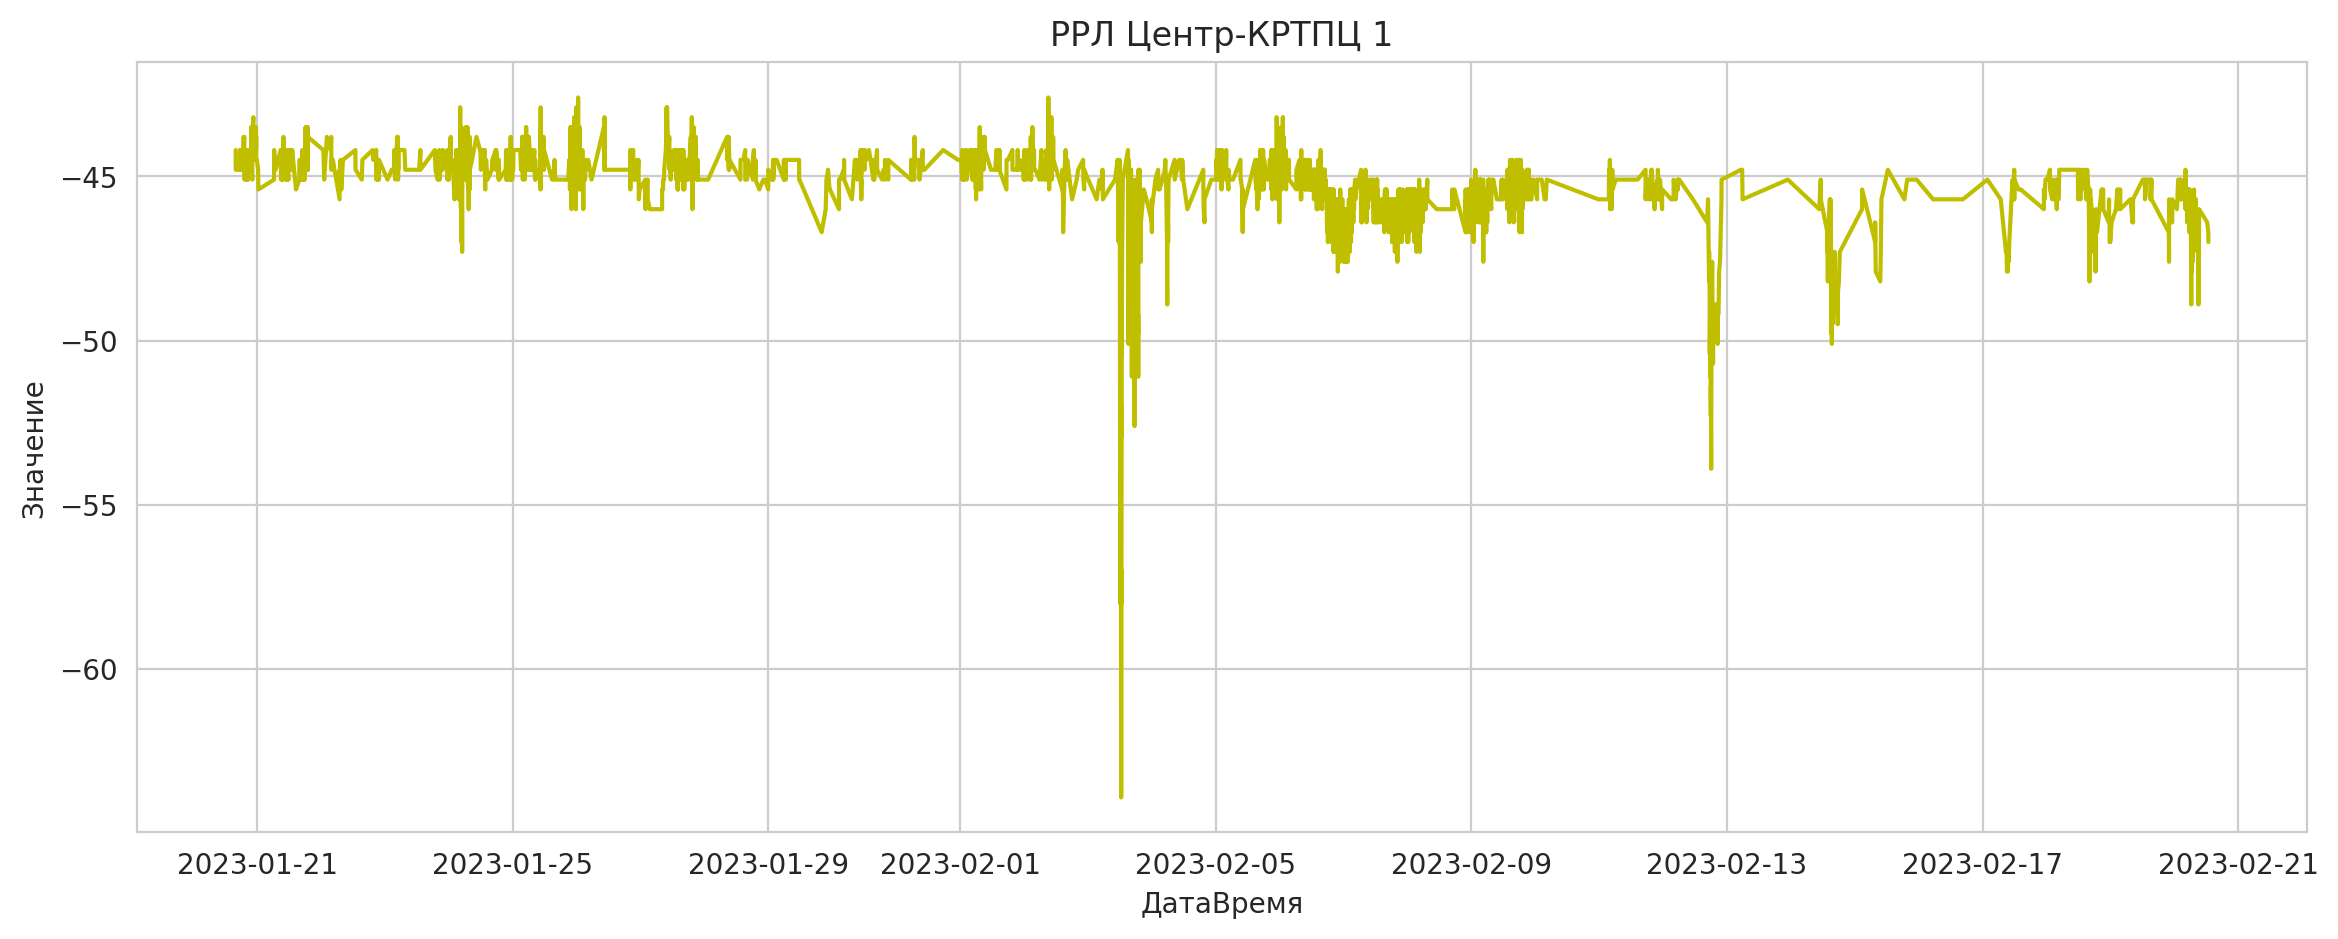

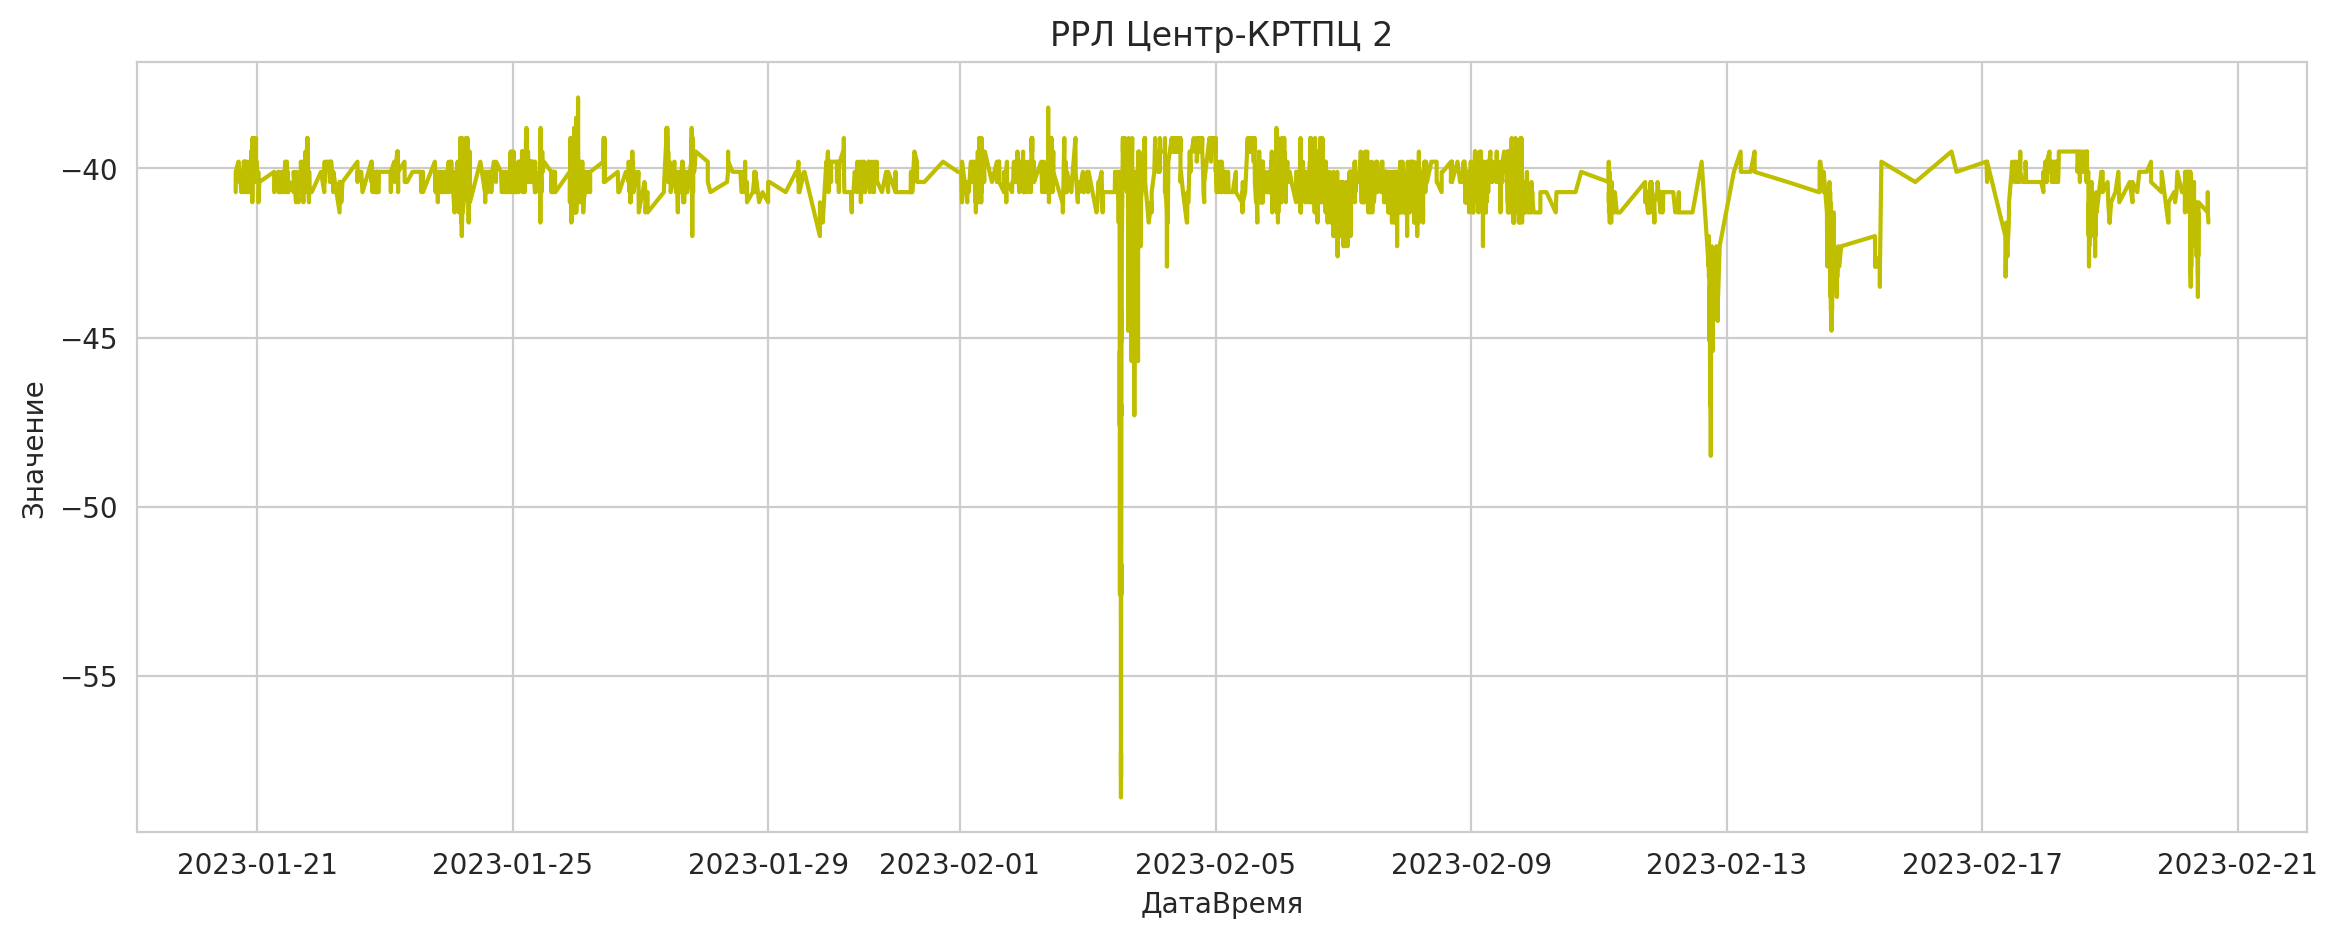

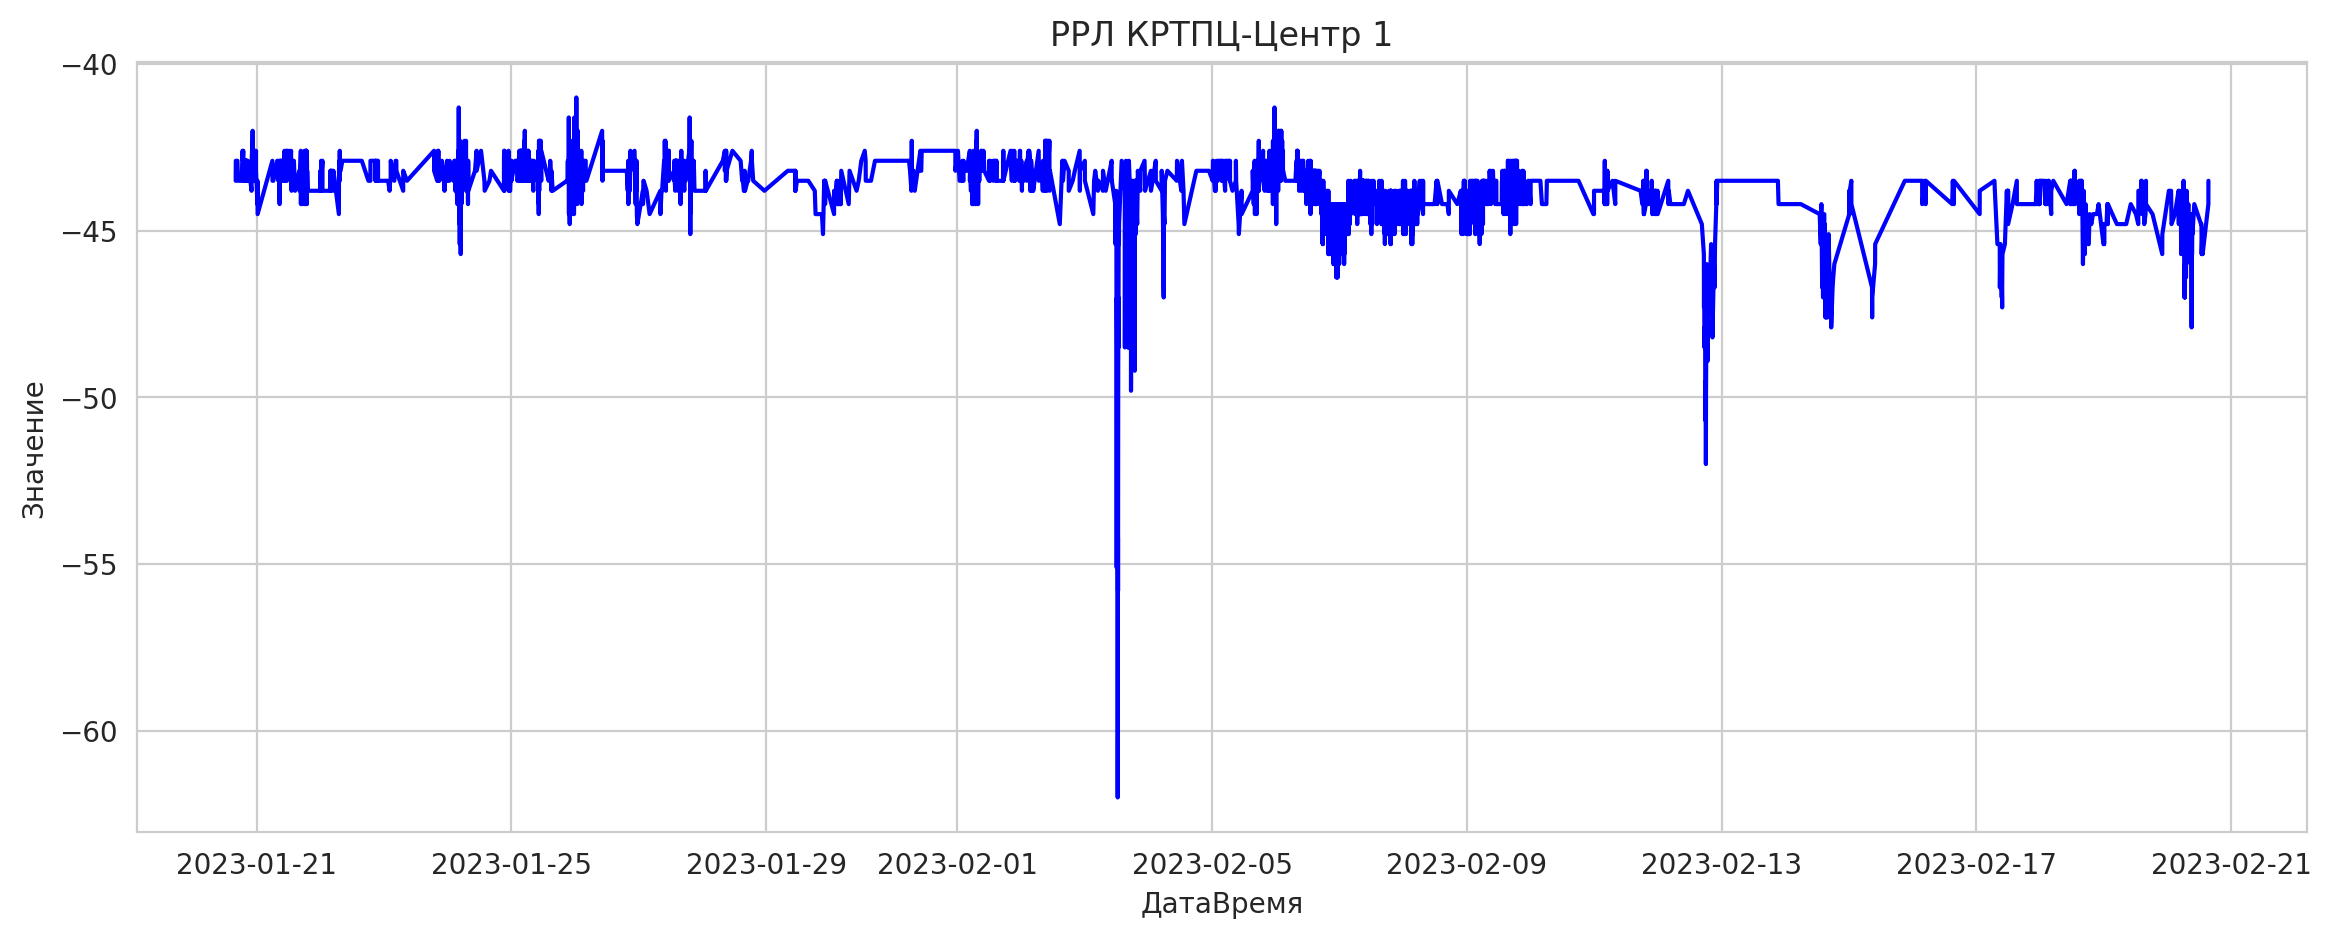

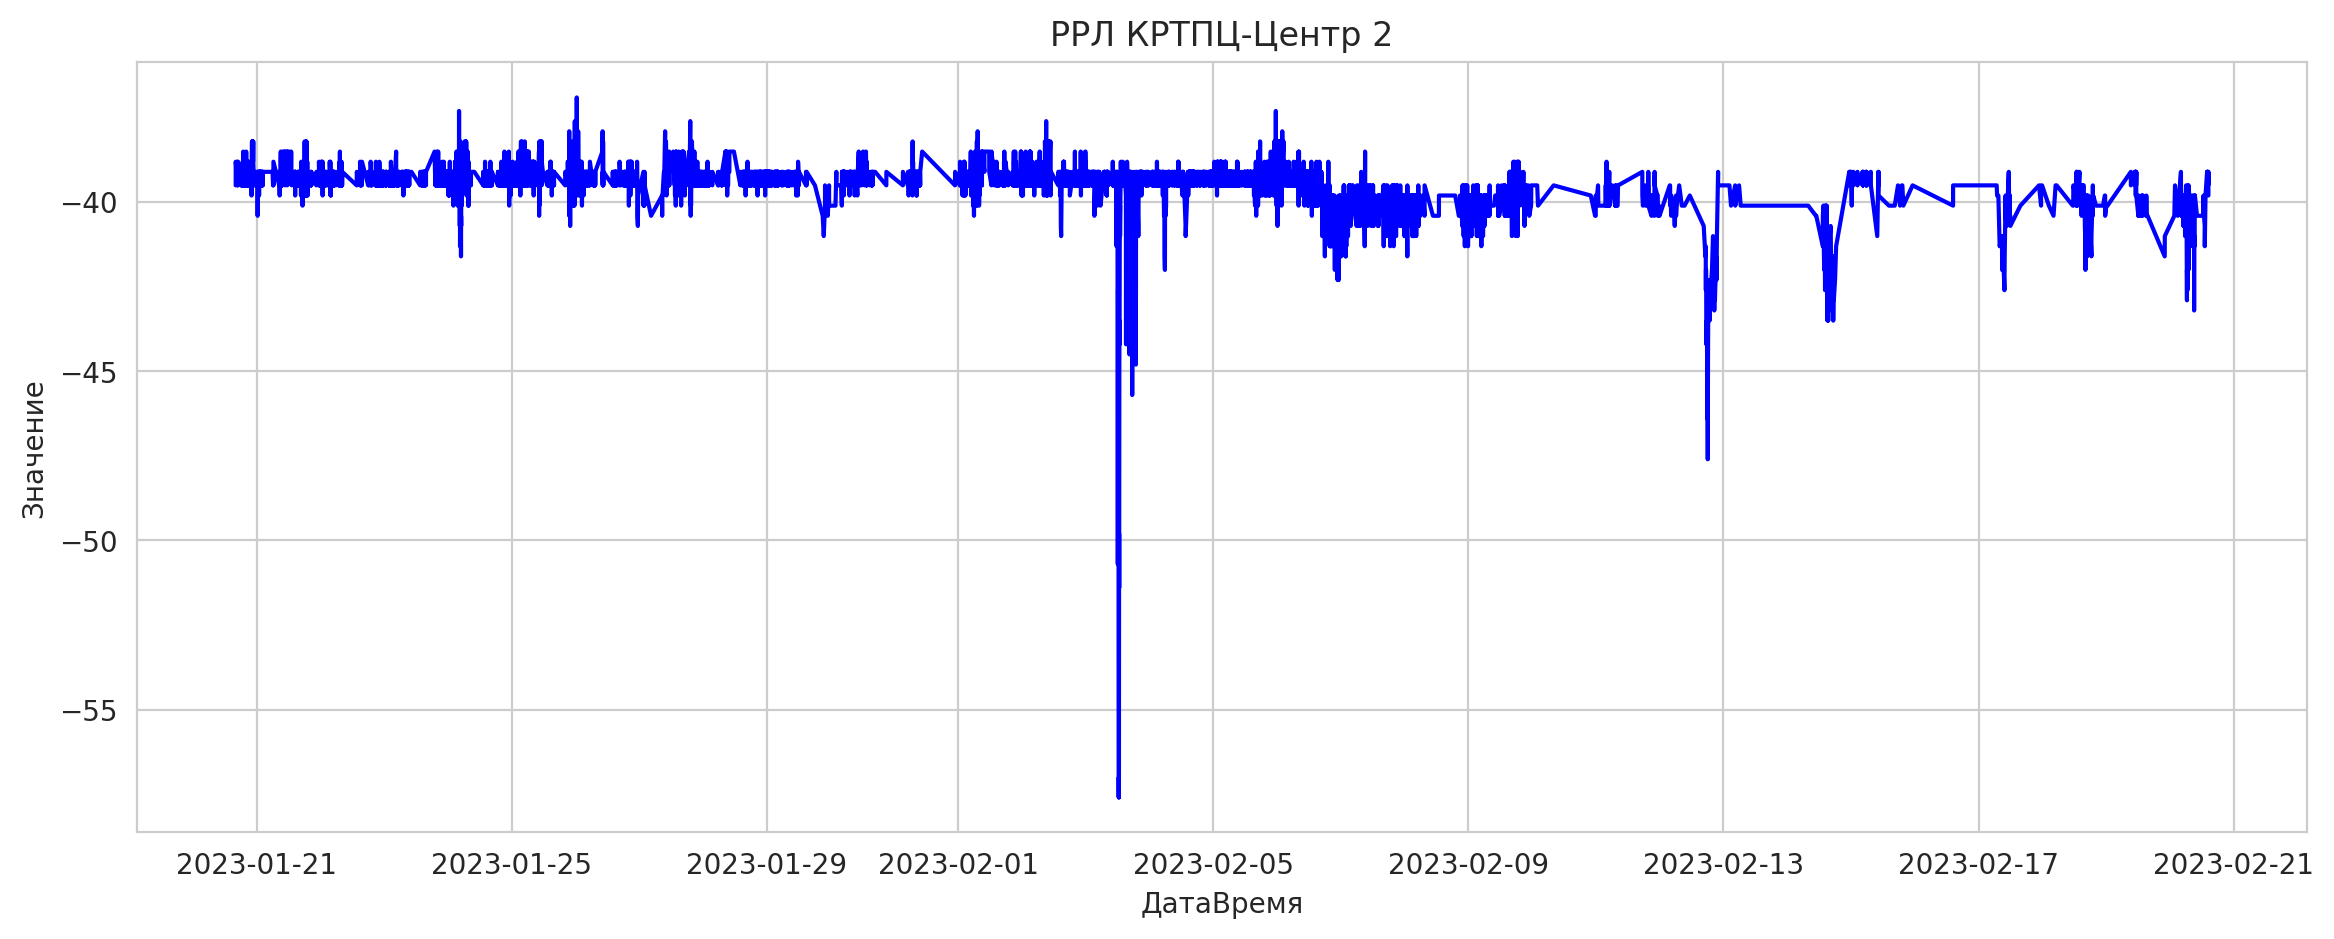

In [82]:
for i in range (0, len(spisok_df1)):
    get_plot1(spisok_df1,colors1,spisok_title1)
    

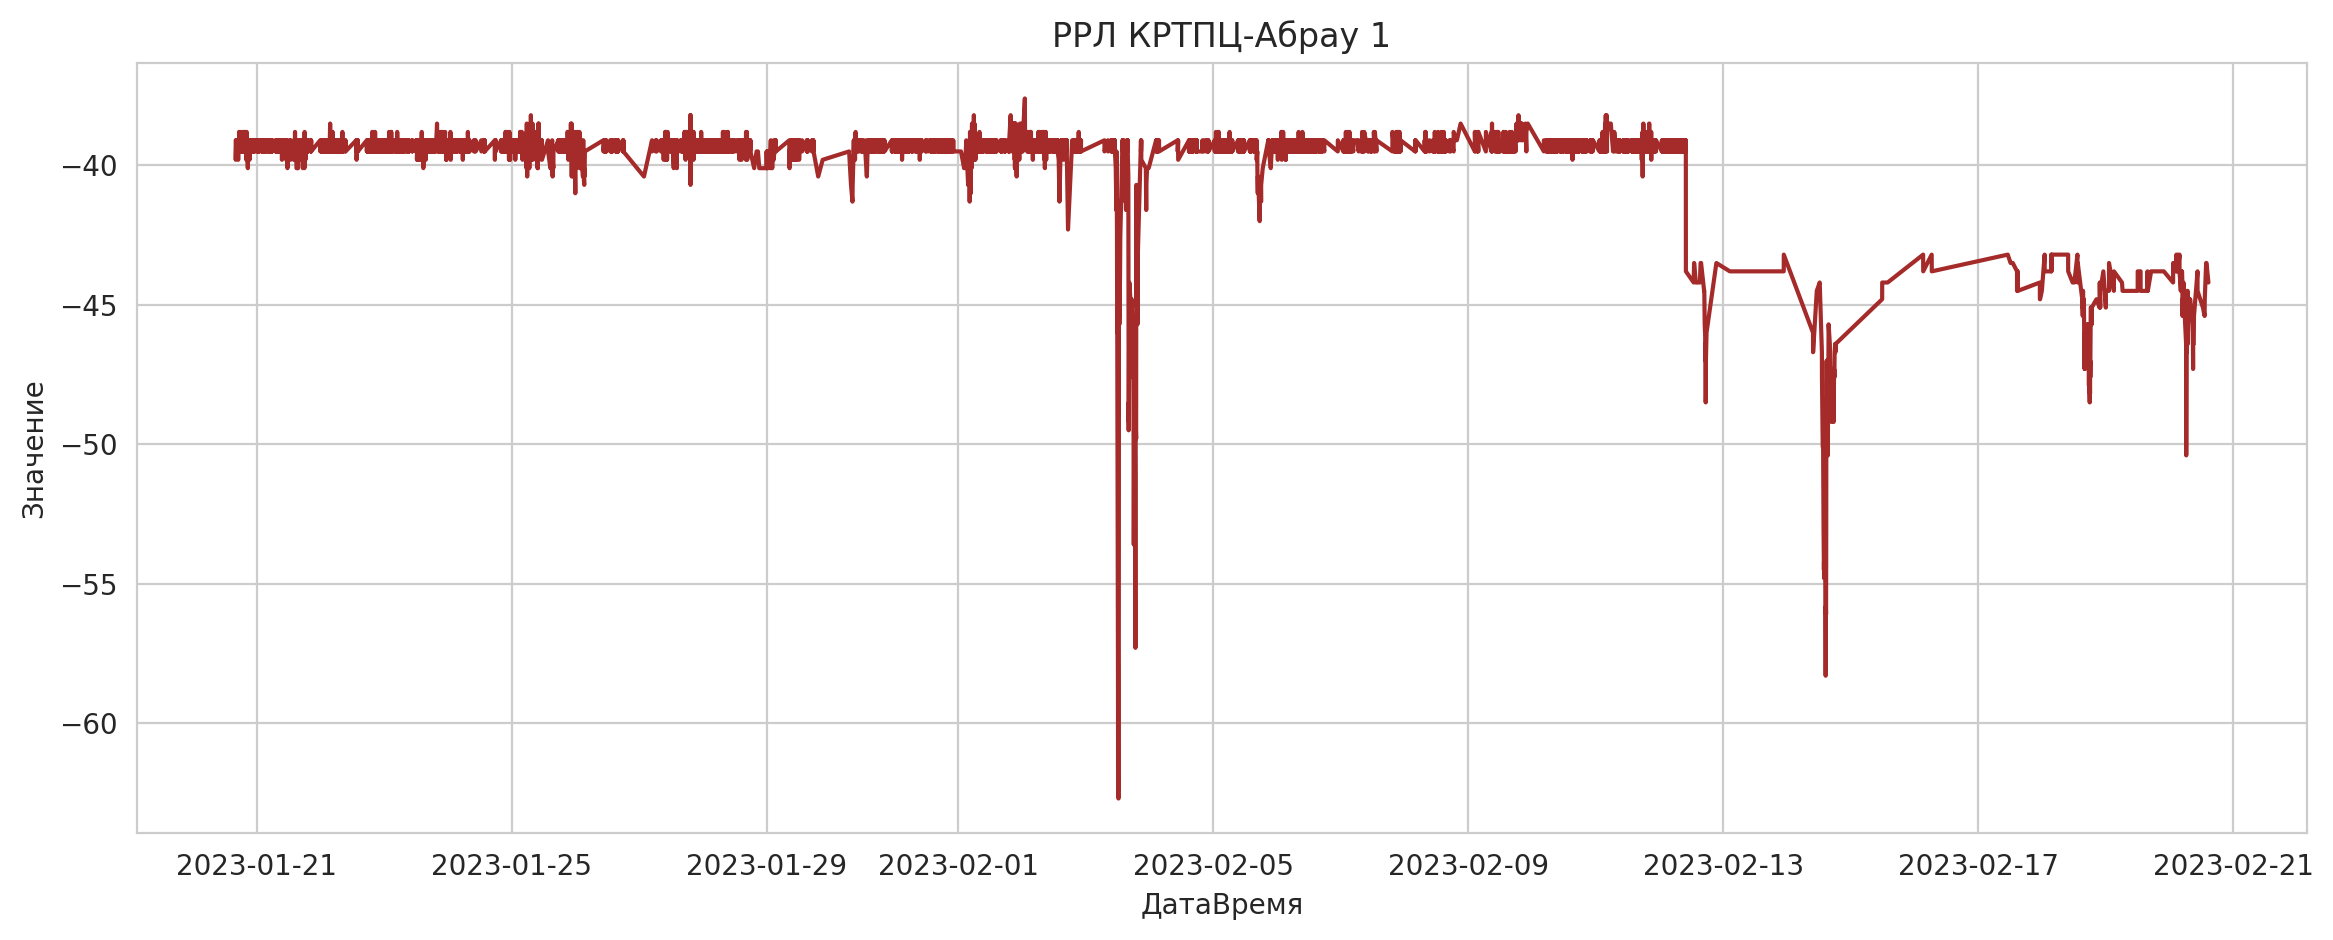

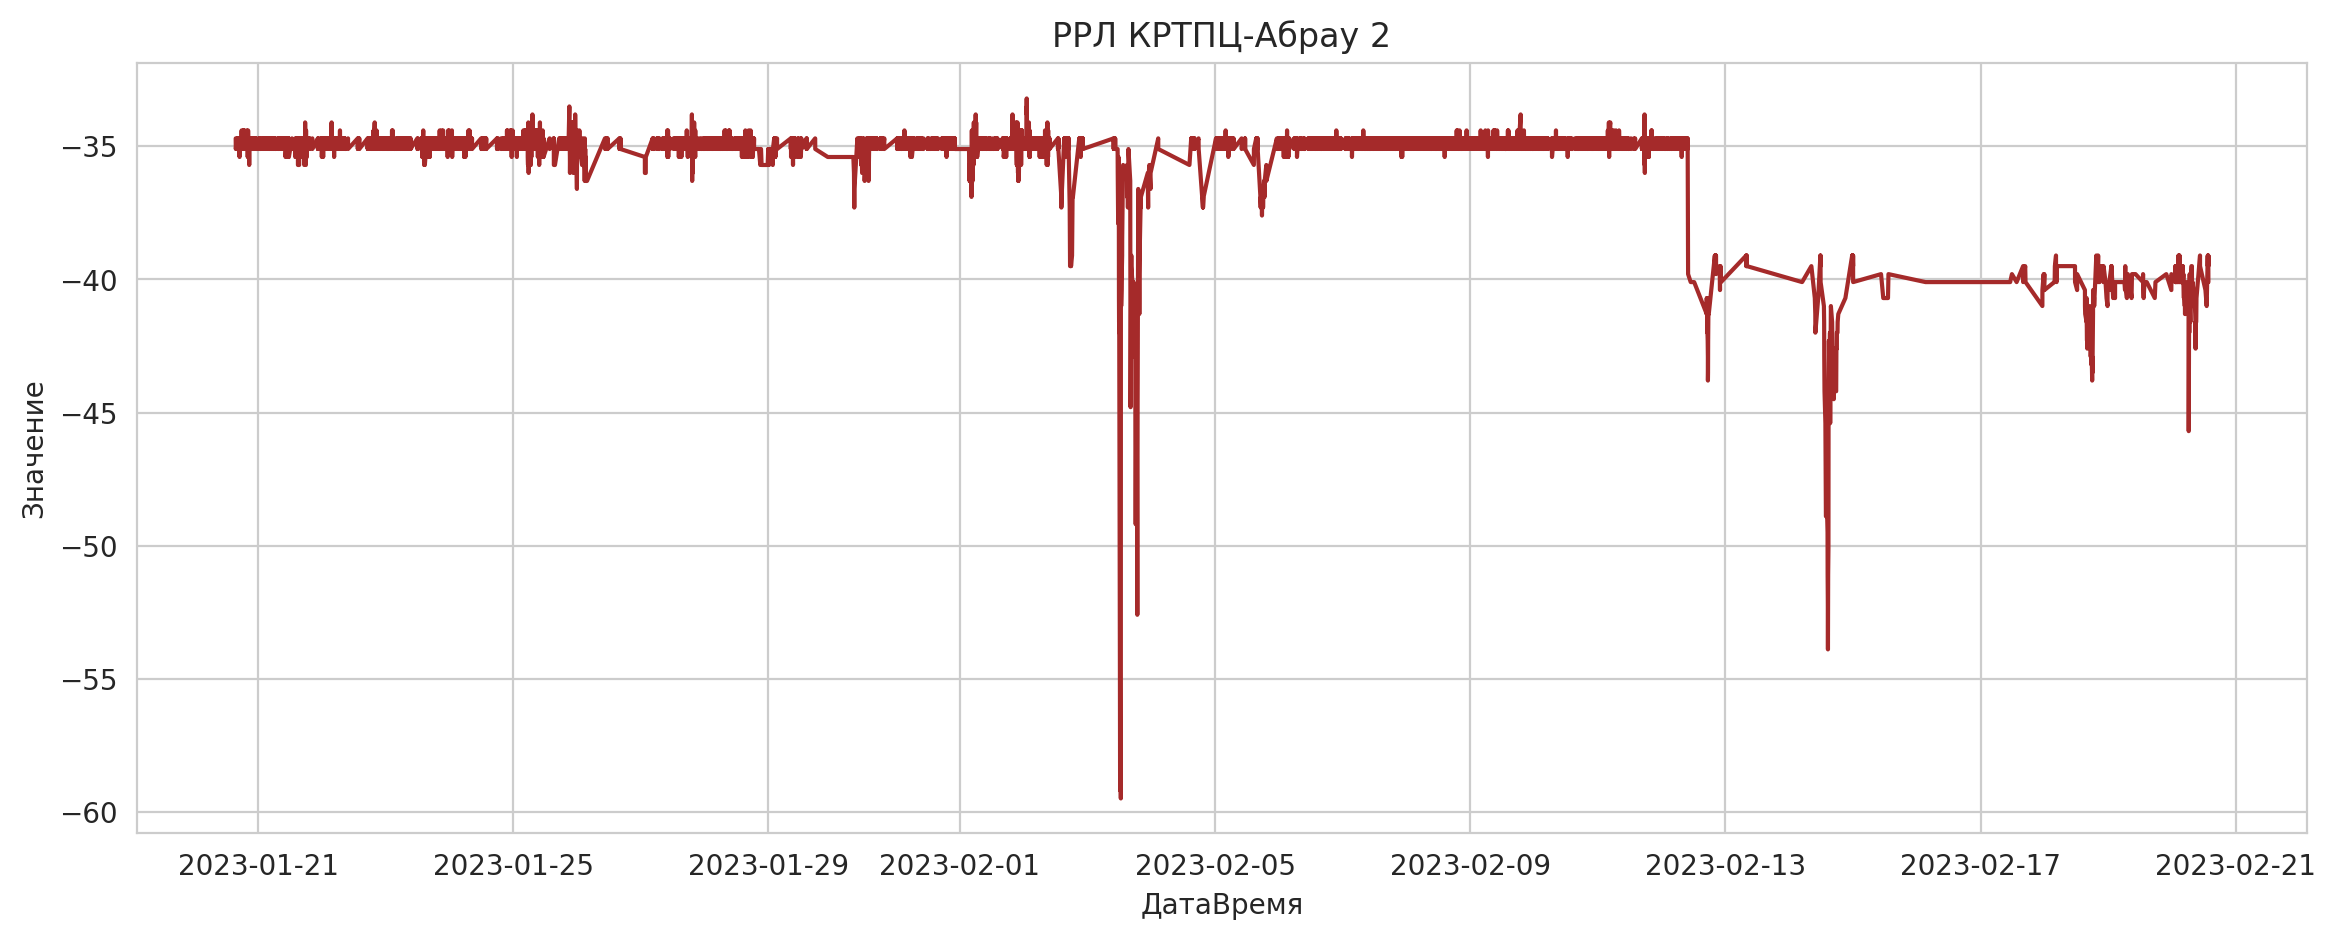

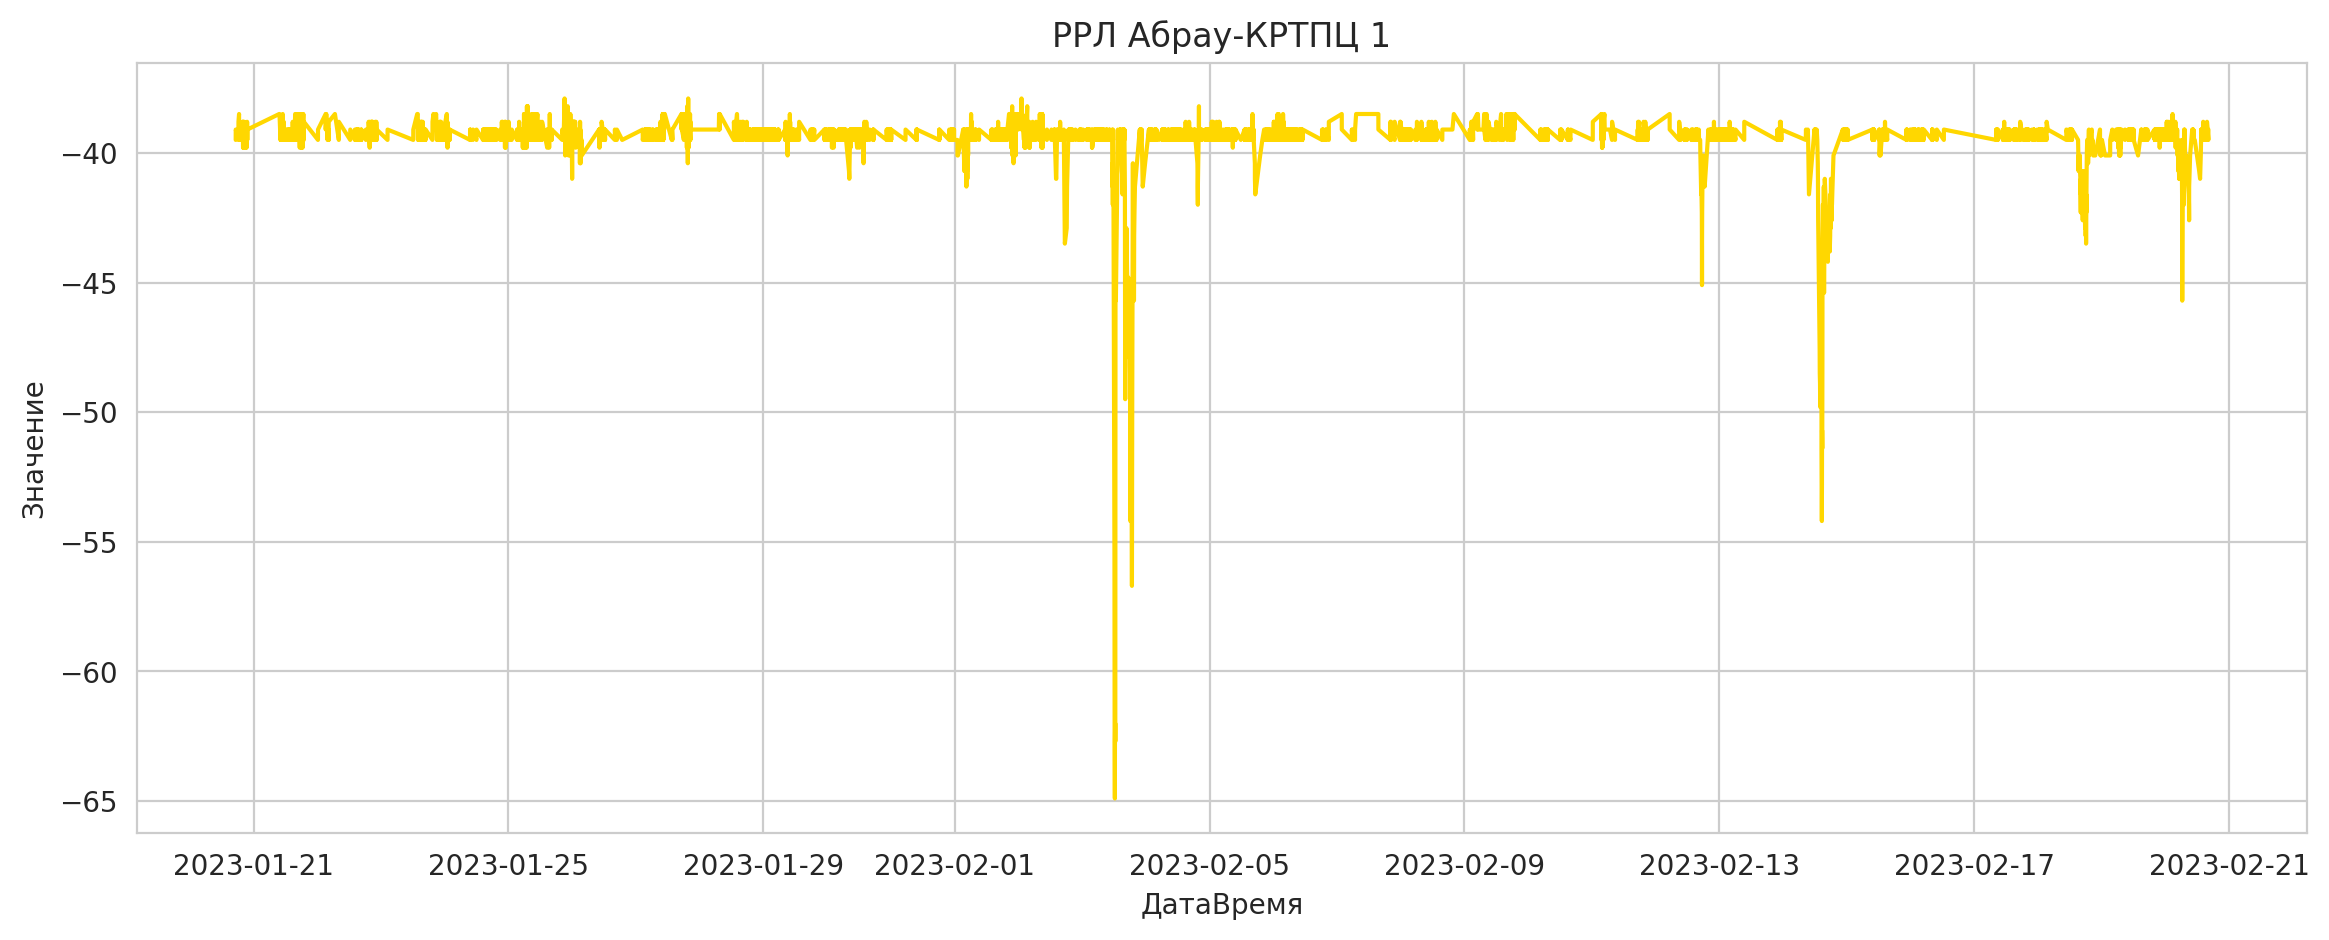

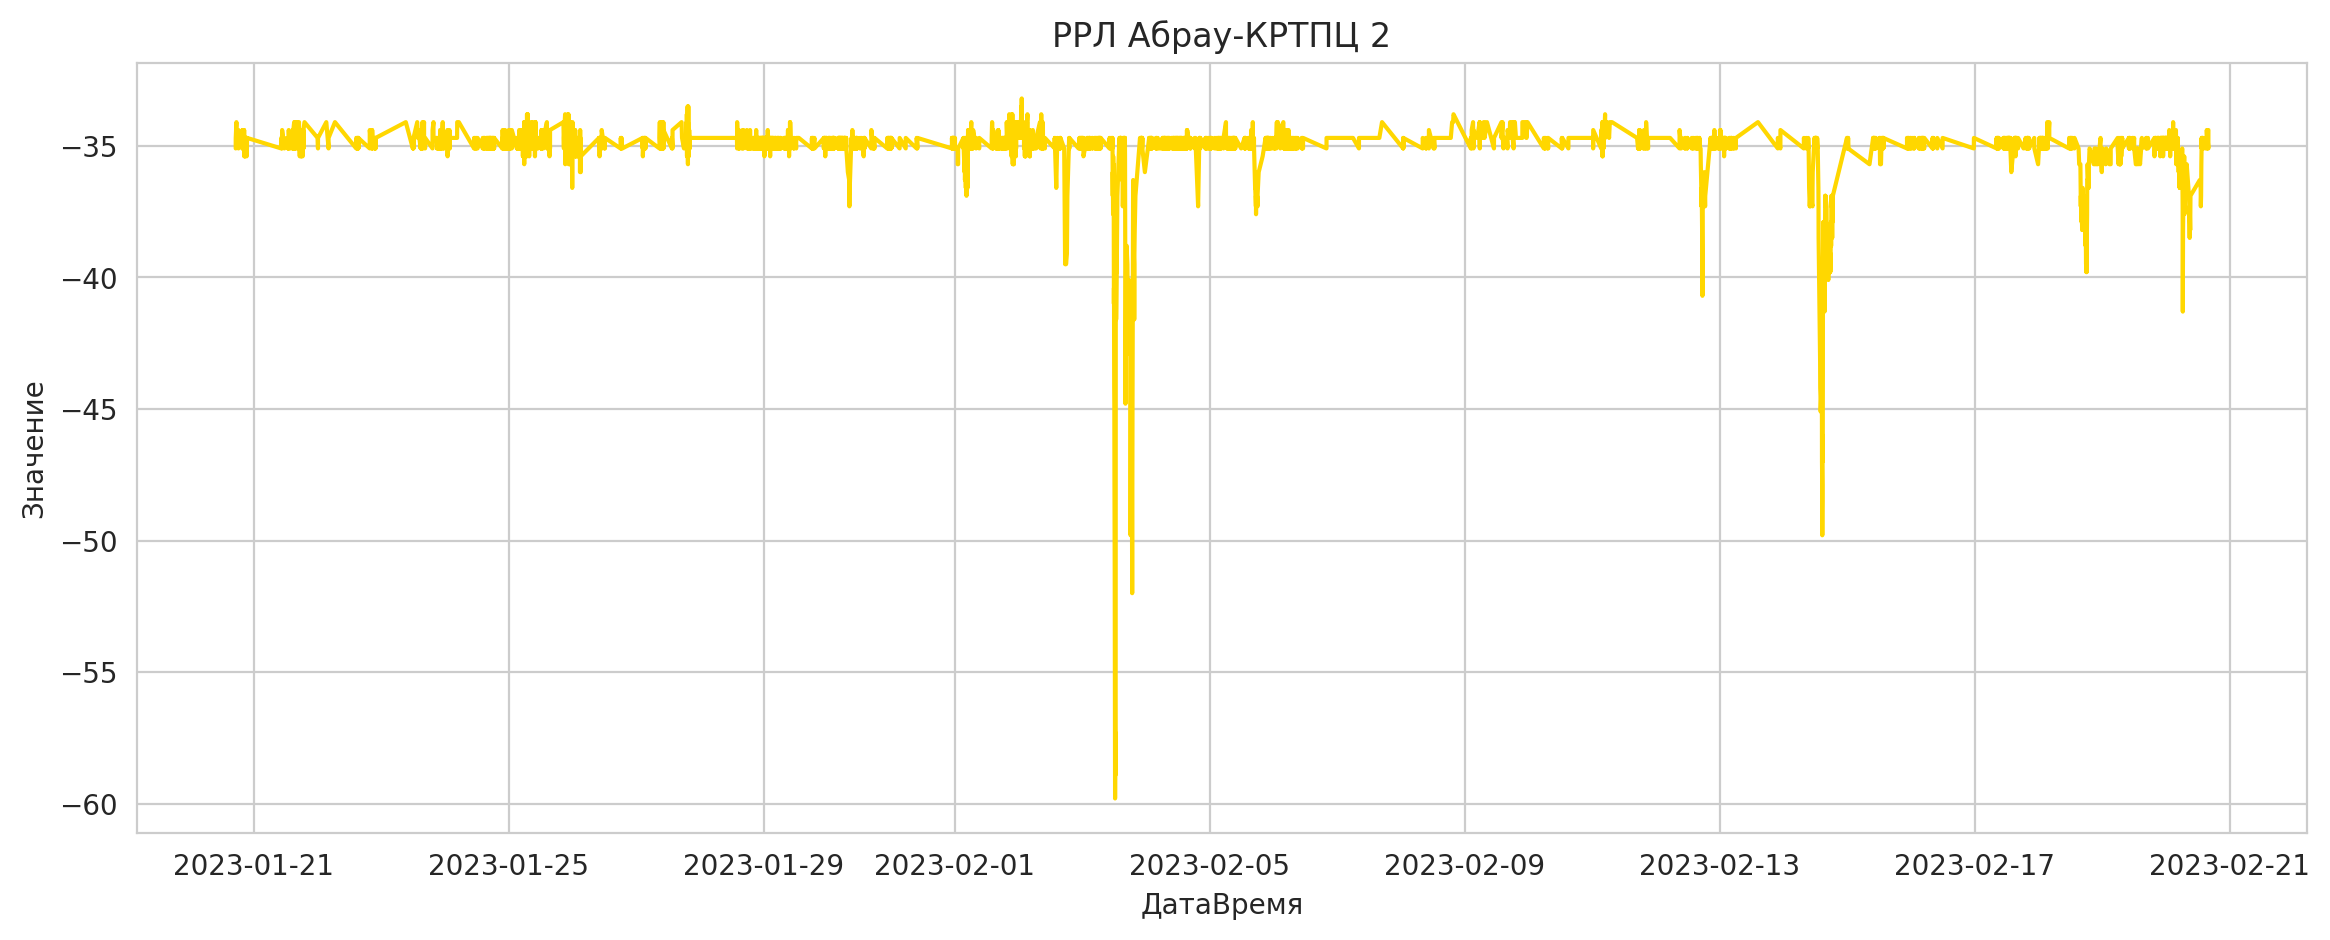

In [83]:
for i in range (0, len(spisok_df2)):
    get_plot1(spisok_df2,colors2,spisok_title2)
    

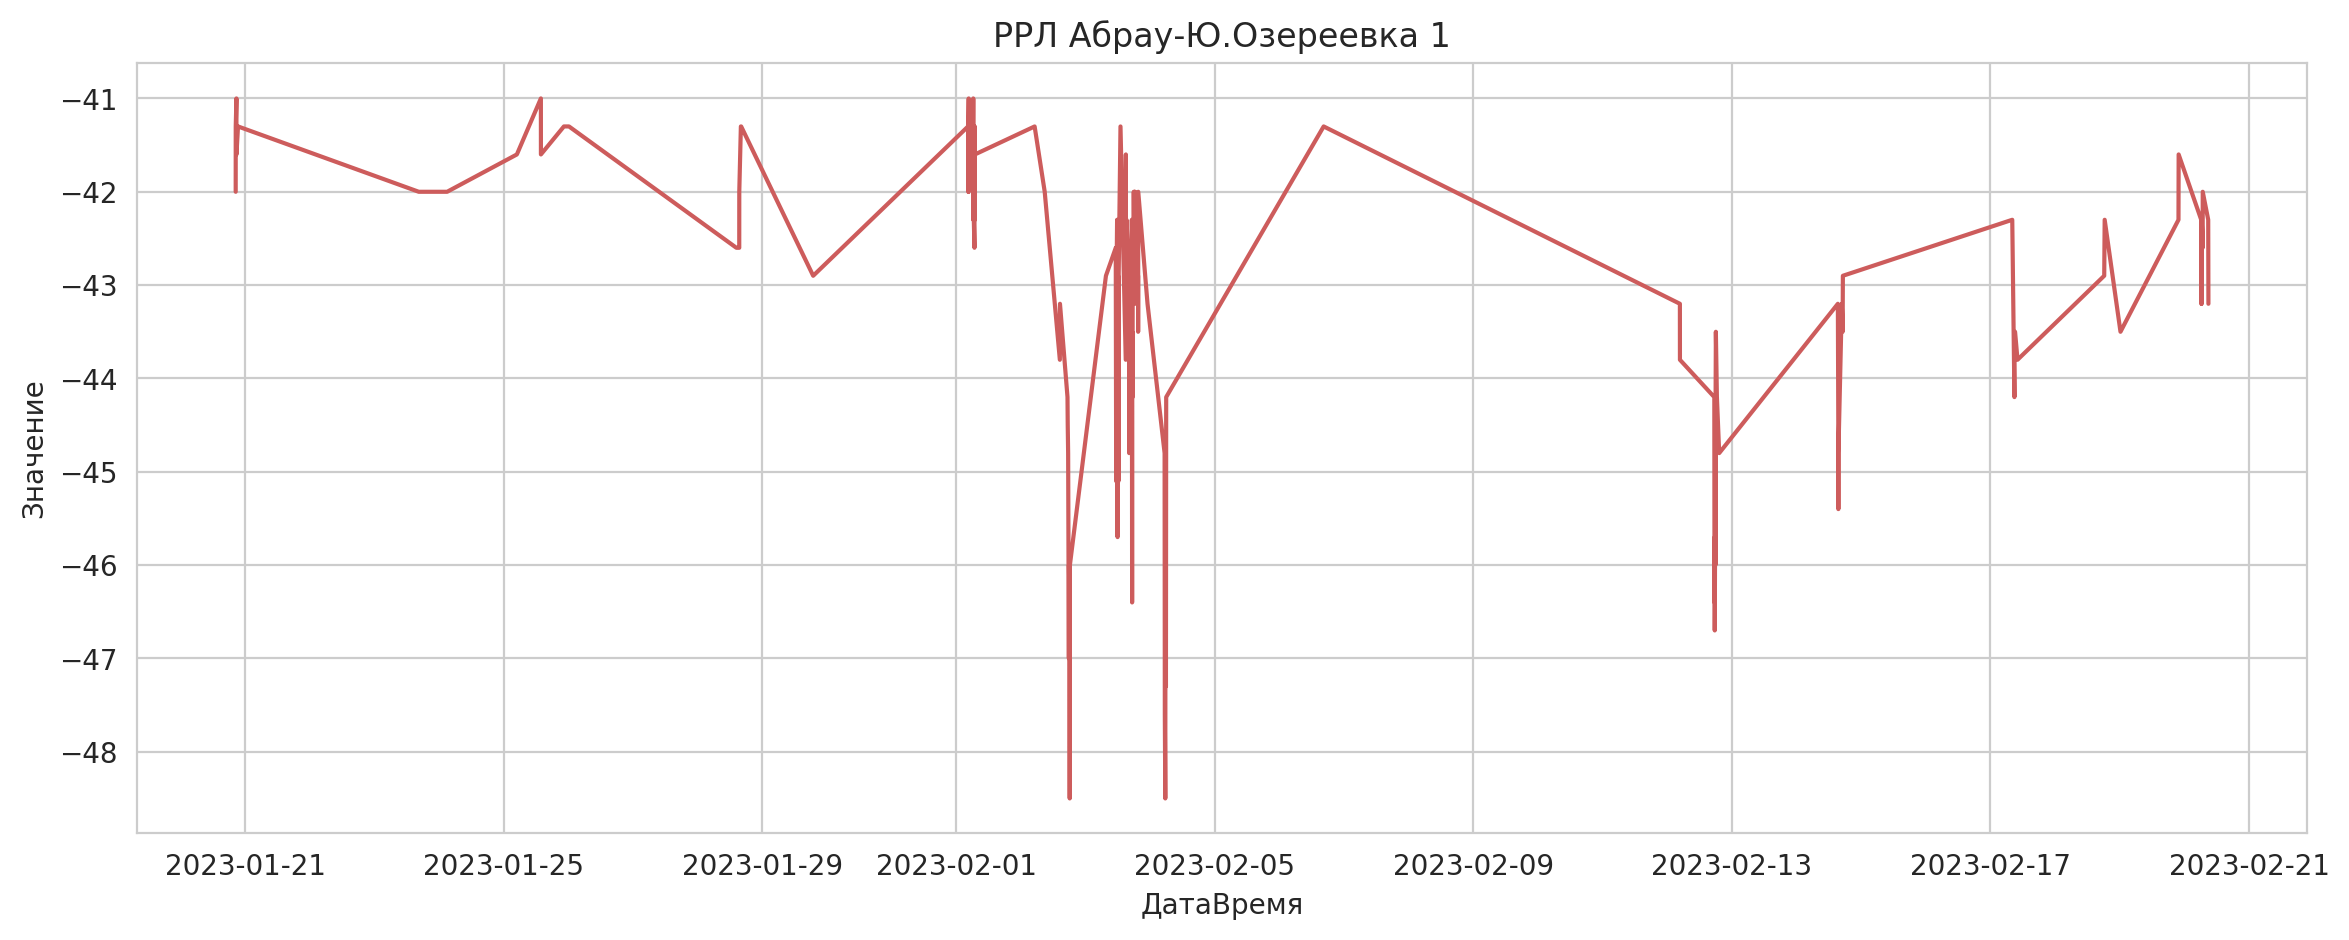

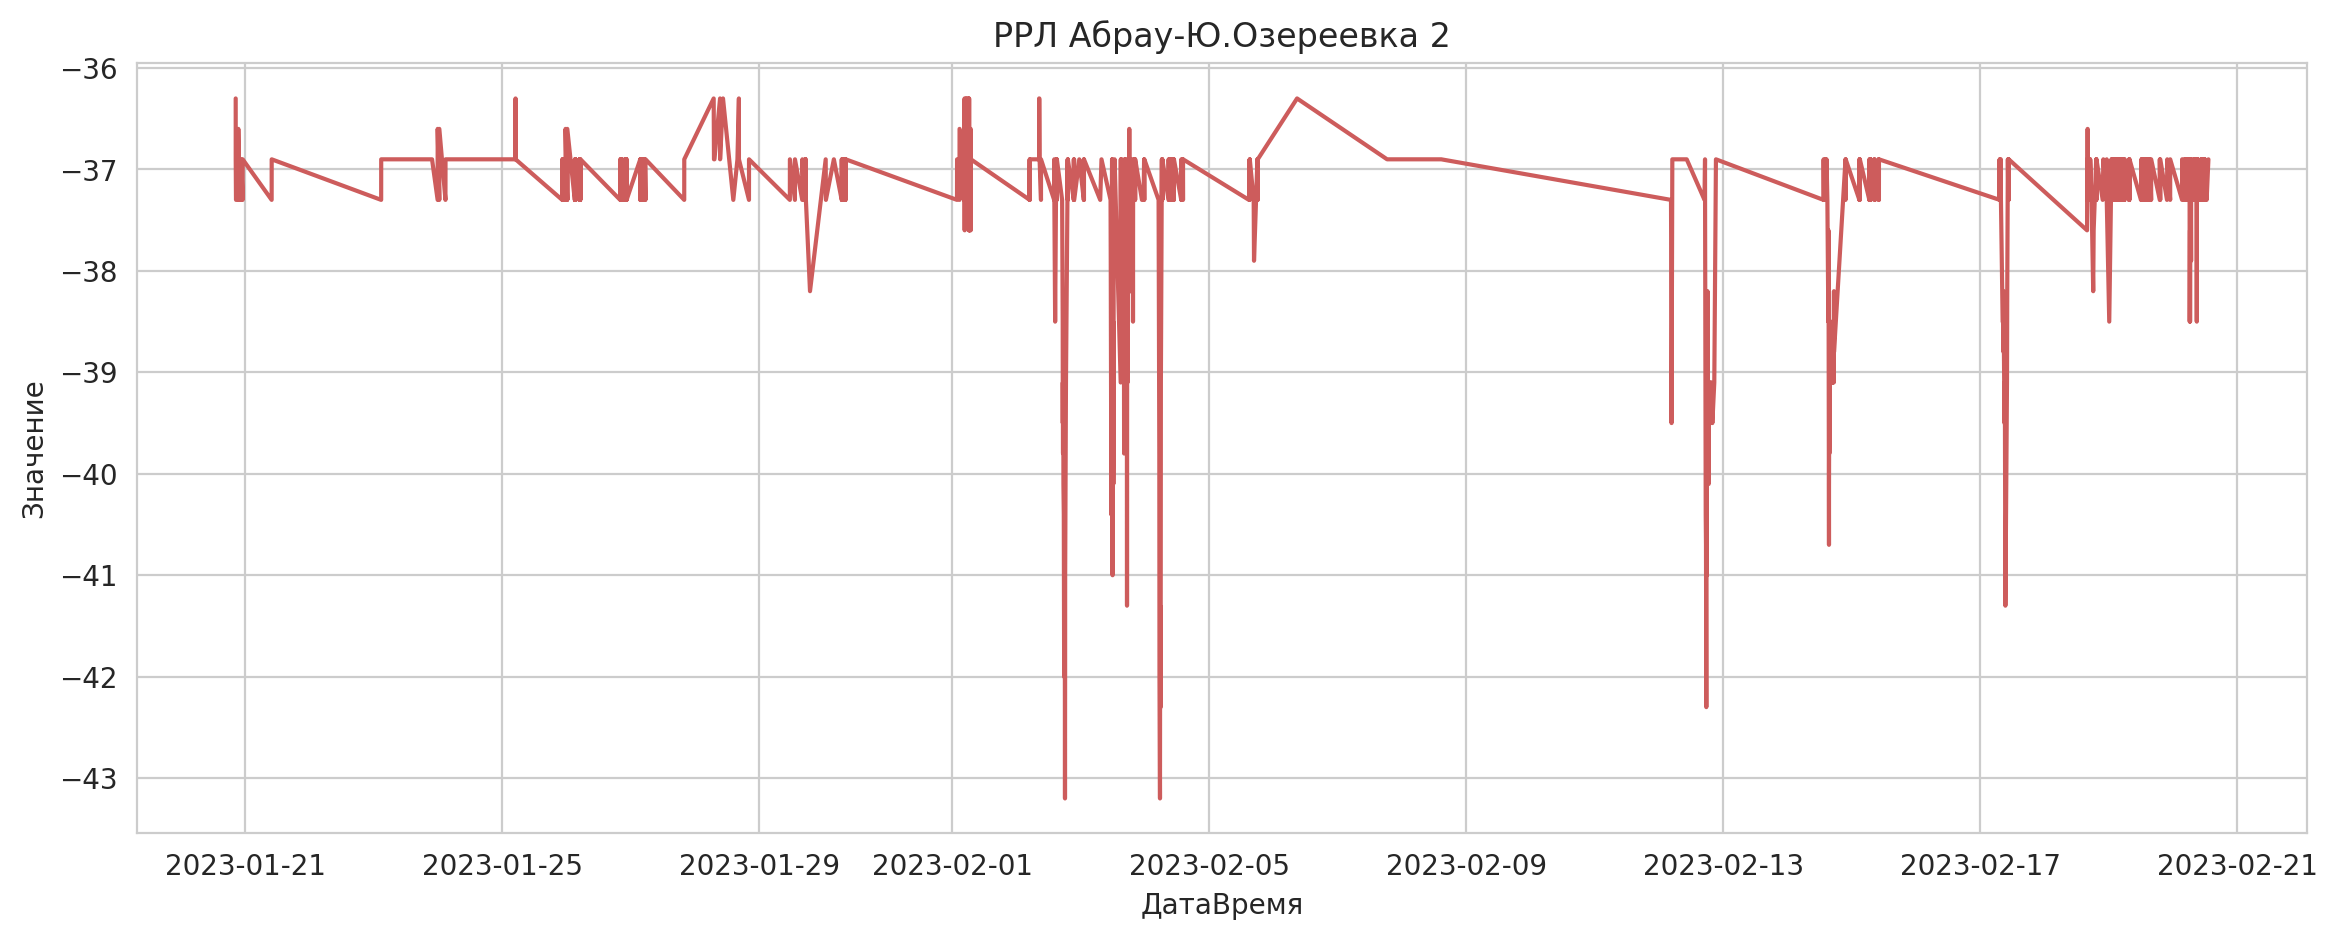

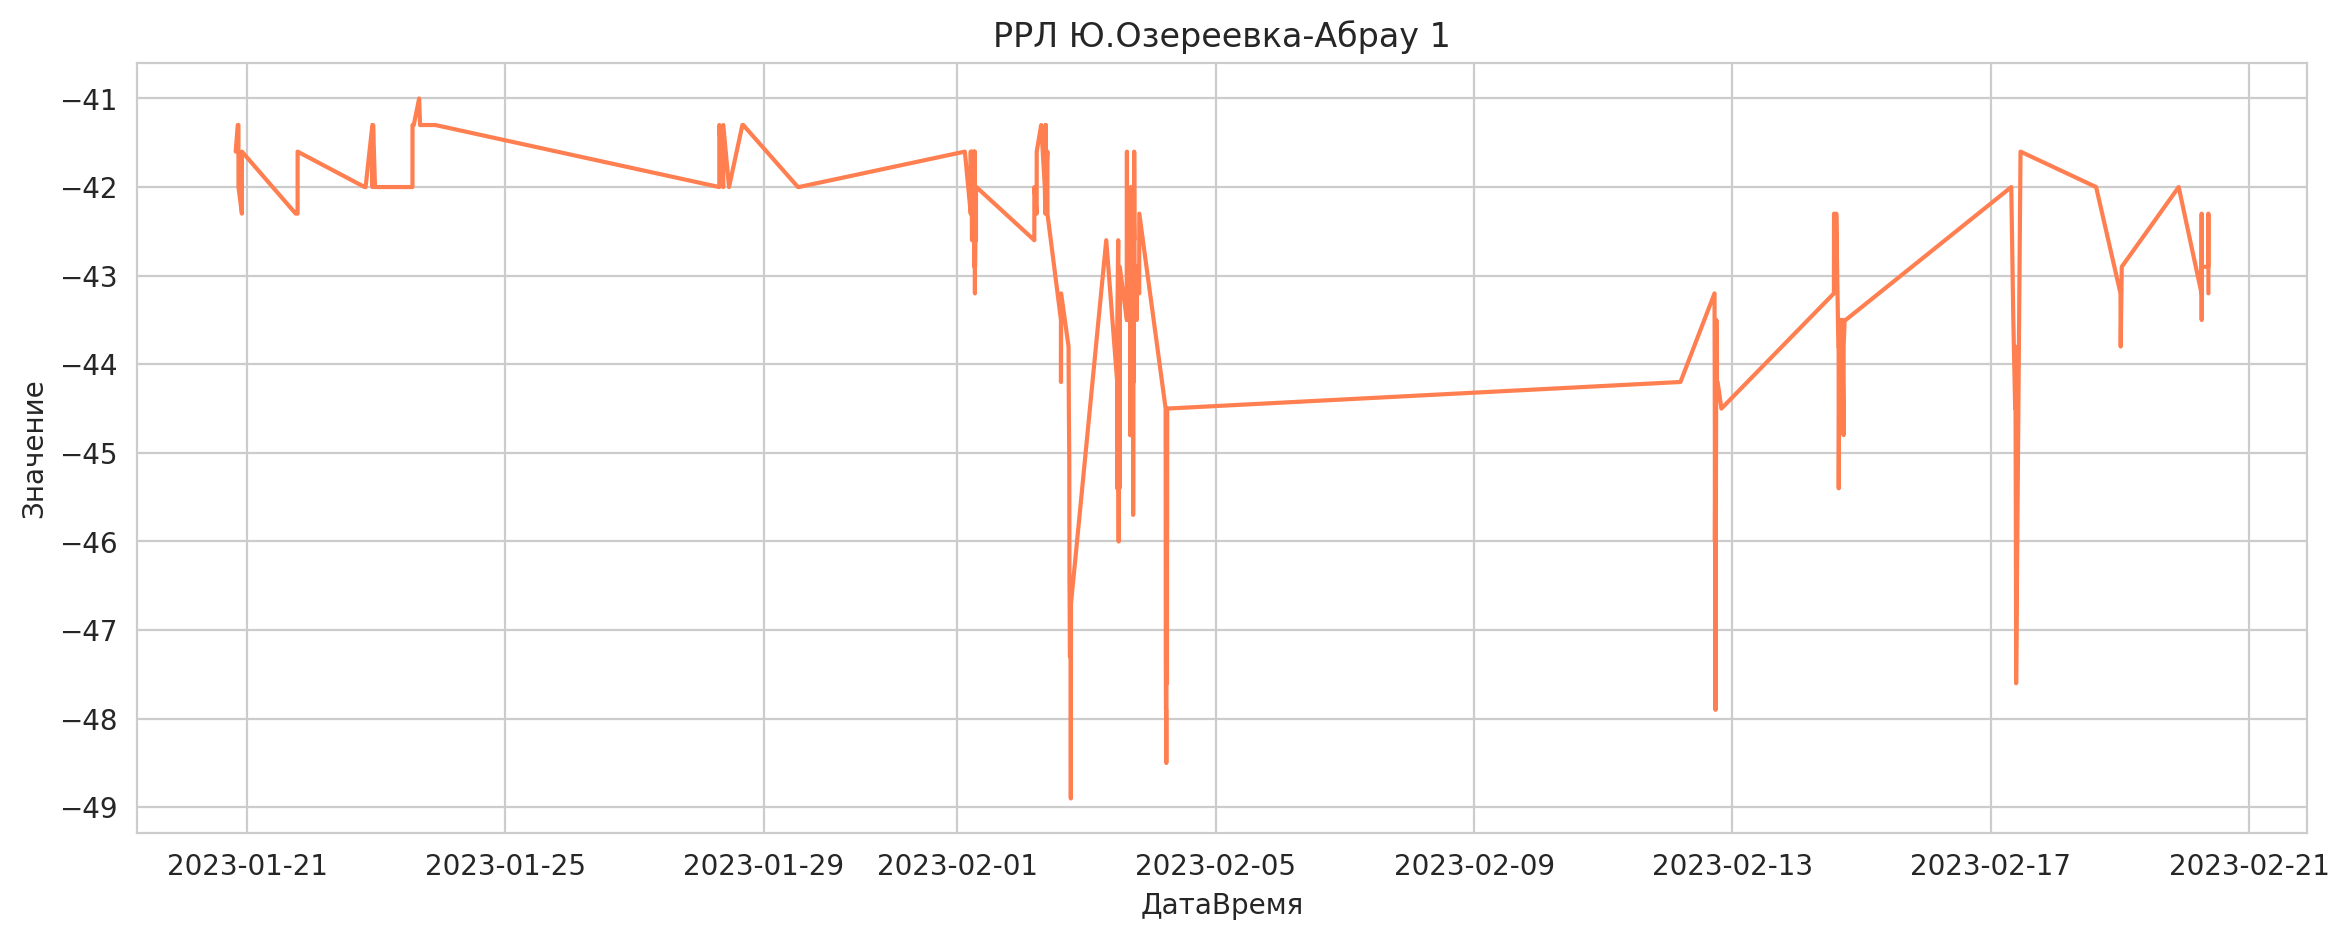

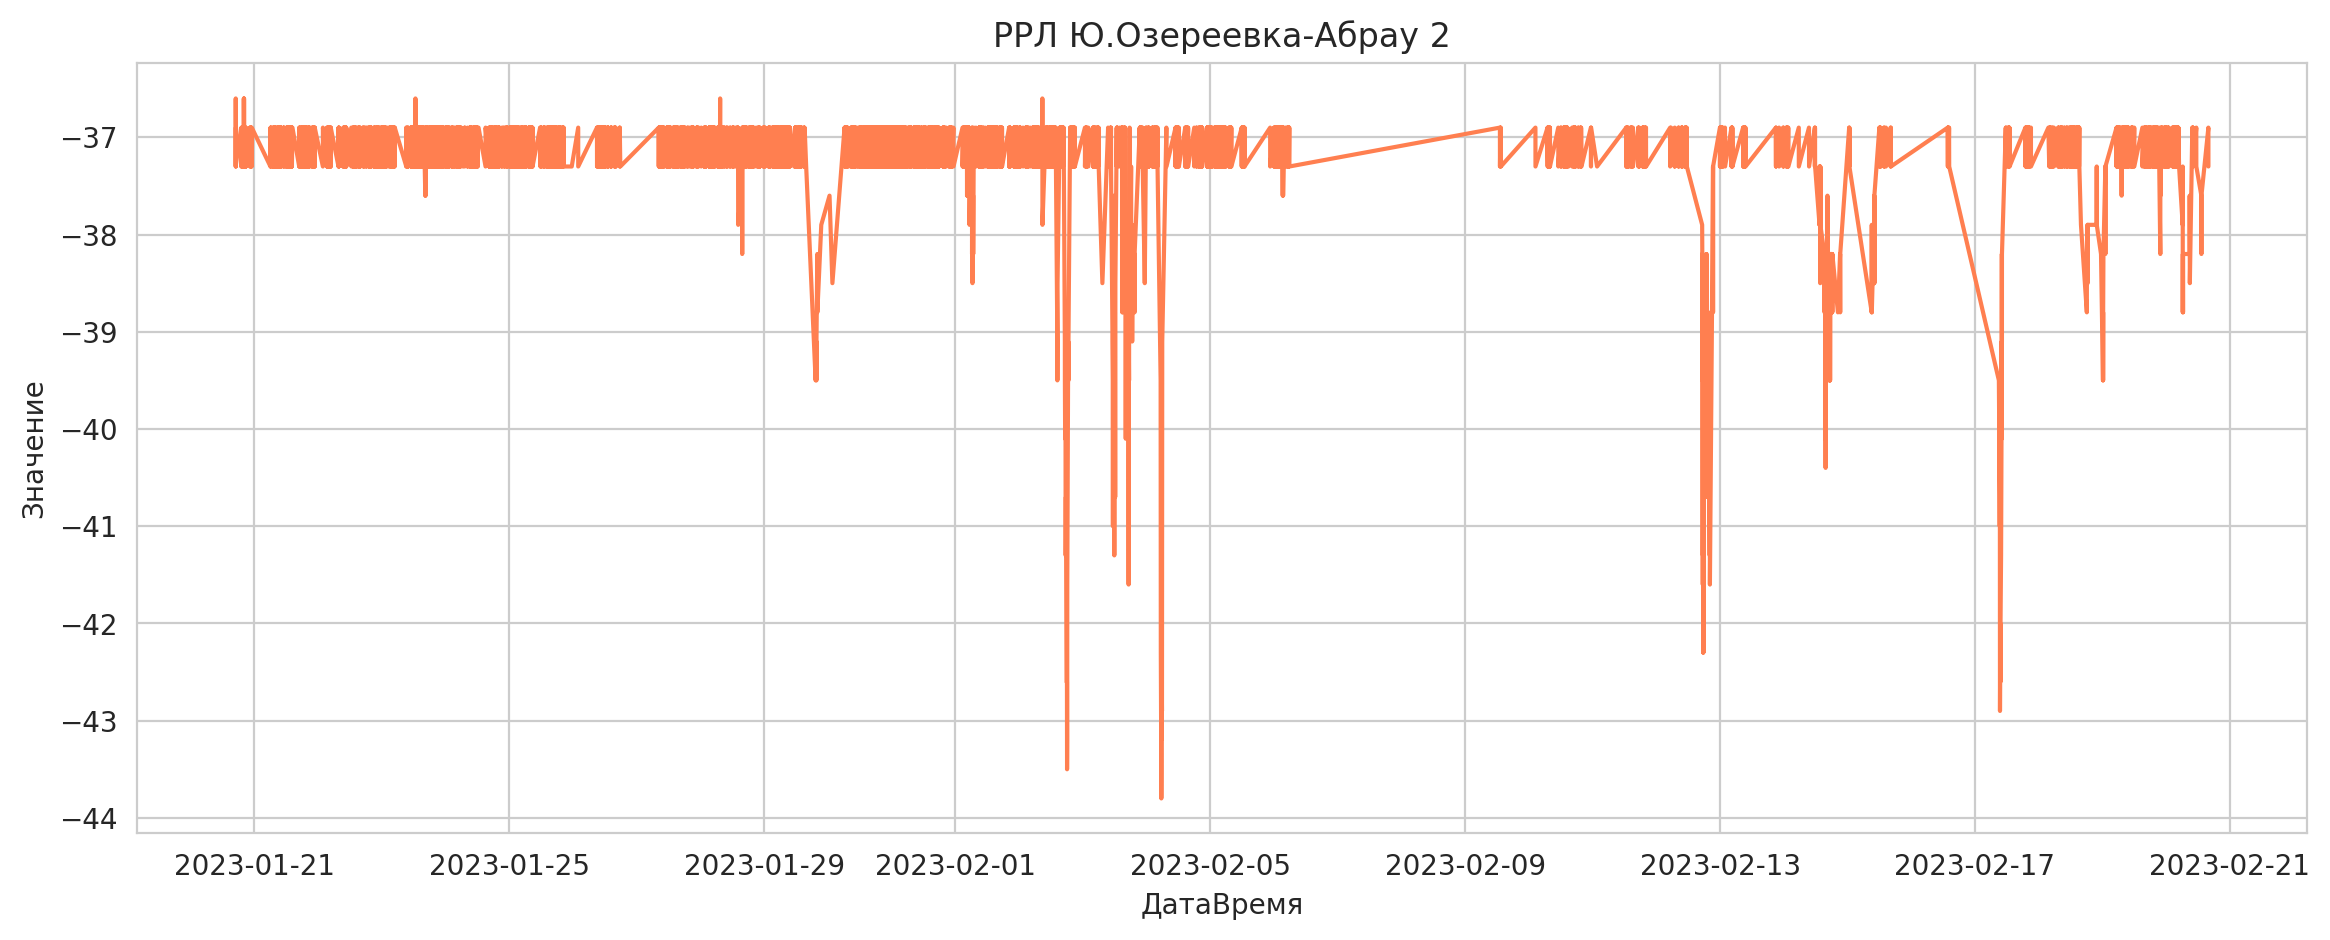

In [84]:
for i in range (0, len(spisok_df3)):
    get_plot1(spisok_df3,colors3,spisok_title3)